In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("white")
colors = sns.color_palette("GnBu_r", 10)

from scipy import stats
from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy.stats.stats import pearsonr

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

# Data Jobs: Exploring the Demand for Data Professionals in the US & UK

### Author: Tihomir Todorov

<a href="https://imgur.com/XOGQVdB"><img src="https://i.imgur.com/XOGQVdB.jpg" title="source: imgur.com" width = "1900px"/></a>

<br></br>

## Abstract

### Introduction

Data professionals work as decision-makers and are largely responsible for analyzing and handling a large amount of unstructured and structured data. As more and more businesses get familiar with the field, the demand for data professionals in one way or another is on the rise. The World Economic Forum estimates this year will see data scientists and analysts ranked the number one role worldwide. By 2026, the US Bureau of Labor Statistics estimates data science and AI will create around 11.5 million job openings.

In order to do so, they require various tools and programming languages for Data Science such as: Python, R, SQL, Excel, Apache Spark, Tableau, Tensorflow, and many others.

<br>


### Motivation

I am a business coach who is planning to transition into the Data Science field, and to get a better picture of what's ahead of me I thought it would be a great thing to go through one of the best review sites Glassdoor & Reed to see the salary of the employee, and the expectations of the company from a data science employee. The requirements put out by the company will help me understand the skills that I need to develop before I apply for a job and give me an overview of the different positions related to working with data. This was what inspired me to do this project, I like to combine the learning with the practicality.

<br>

### Previous Research

This project was inspired by Ken Jee and you can find the original research [here](https://github.com/PlayingNumbers). You can also check out his videos in YouTube on this [link](https://www.youtube.com/watch?v=MpF9HENQjDo&list=PL2zq7klxX5ASFejJj80ob9ZAnBHdz5O1t).

I decided to learn from Ken's senior skills what is useful for me. Even so, as I was working, I was understanding that my skills was not so inferior as I thought and I kept adding and enhancing some parts I noticed that can be improved.


<br>

### The Data

For this project we will use two different datasets, that provide us with observations of the US and the UK data job market:

1. "all_jobs.csv" - containing data, that is scraped from glassdoor.com, providing us with a lot of information about the US job market. It can be found on [Kaggle](https://www.kaggle.com/datasets/josephgutstadt/data-jobs).

- Information about the dataset (BEFORE CLEANING):

        - Job Title: the title of job, eg. Data scientist, junior data scientist, senior data scientist etc
        - Salary Estimate: range of salary and the source
        - Job Description: tells us what is expected out of the job title
        - Rating: it gives the rating of the company
        - Company Name: name of the company
        - Location: location of the job
        - Headquarters: location of headquarter of the company
        - Size: range of number of employee working in the company
        - Founded:  company founded in Year
        - Type of ownership:  tells us if the company is private, public or government owned
        - Industry:  industry of the company
        - Sector:  sector in which company works
        - Revenue:  total revenue of the company per year
        - Competitors:  current competitor of the company in the same sector
        - Easy Apply:  contains information about the method of application
<br>

2. "deduped-jobs.csv" - a collection of observations from reed.co.uk, containing useful data from the UK data job market. It can also be downloaded on Kaggle [here](https://www.kaggle.com/datasets/devario/uk-data-science-jobs-dataset).

- Information about the dataset (BEFORE CLEANING):

        - reference: Provides us with an ID of the record
        - title: the title of job, eg. Data scientist, junior data scientist, senior data scientist etc
        - date_posted: shows us the date of posting of the advertisement
        - date_ending: the expiration of the advertisement
        - advertiser: describes the company that advertises the job
        - location: location of the job
        - city: more specific location
        - country: the job's country
        - salary: a duplicate of the following feature
        - salary_min: the estimate minimum salary
        - salary_max: the estimate maximum salary
        - salary_frequency: shows if the salary is annual
        - salary_currency: shows the currency, but it's all null values, as the whole data is in GBP
        - description: tells us what is expected out of the job title
<br>

### Areas of Interest

In this project we will try to answer the following questions:

1. What is the current demand of skills in the data job market and how are they related to the estimated income?

2. Is there a meaningful difference between the projected salaries and the required skills in the US and the UK market?

3. What is the relation between the company's size, revenue, and type of ownership with the expected salary projections?

4. Which data job position gets paid the most, and which the least?

5. What are the most favorable places to be employed as a data professional?

6. And much more to come in the process of exploration...

<br>

We can have those questions in mind, in order to clean our data according to our needs.


 <a name="data_cleaning"></a>
## Data Cleaning and Preparation

Let's read the first dataset see how our data looks:

In [3]:
data_glassdoor = pd.read_csv("data/all_jobs.csv")

In [4]:
data_glassdoor.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,Business Analyst - Clinical & Logistics Platform,$56K-$102K (Glassdoor est.),Company Overview\n\n\nAt Memorial Sloan Ketter...,3.9,Memorial Sloan-Kettering\n3.9,"New York, NY","New York, NY",10000+ employees,1884,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),"Mayo Clinic, The Johns Hopkins Hospital, MD An...",-1
1,1,Business Analyst,$56K-$102K (Glassdoor est.),We are seeking for an energetic and collaborat...,3.8,Paine Schwartz Partners\n3.8,"New York, NY","New York, NY",1 to 50 employees,-1,Company - Private,Venture Capital & Private Equity,Finance,Unknown / Non-Applicable,-1,True
2,2,Data Analyst,$56K-$102K (Glassdoor est.),"For more than a decade, Asembia has been worki...",3.6,Asembia\n3.6,"Florham Park, NJ","Florham Park, NJ",501 to 1000 employees,2004,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$5 to $10 million (USD),-1,-1
3,3,"Information Security Analyst, Incident Response",$56K-$102K (Glassdoor est.),Job Description Summary\nThe Information Secur...,3.6,BD\n3.6,"Franklin Lakes, NJ","Franklin Lakes, NJ",10000+ employees,1897,Company - Public,Health Care Products Manufacturing,Manufacturing,$10+ billion (USD),"Abbott, Siemens, Baxter",-1
4,4,Analyst - FP&A Global Revenue,$56K-$102K (Glassdoor est.),Magnite is the world's largest independent sel...,3.4,Rubicon Project\n3.4,"New York, NY","Los Angeles, CA",201 to 500 employees,2007,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"PubMatic, AppNexus, Index Exchange",True


In [5]:
data_glassdoor.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,26980.0,3737.639214,2524.055272,0.0,1611.0,3398.5,5635.0,9883.0
Rating,26980.0,3.307435,1.471339,-1.0,3.2,3.7,4.0,5.0
Founded,26980.0,1482.625574,853.727200,-1.0,1774.0,1976.0,2001.0,2020.0


In [6]:
data_glassdoor[data_glassdoor.isnull().any(axis=1)]

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
5942,5942,IT Field Services Analyst (Desktop Support) - ...,$47K-$55K (Glassdoor est.),Position Summary:\n\nThe primary purpose of th...,-1.0,NaN,"Houston, TX",-1,-1,-1,-1,-1,-1,-1,-1,-1
9842,9842,Financial Analyst - Senior,$41K-$67K (Glassdoor est.),"Kindred at Home, part of the Kindred at Home f...",-1.0,NaN,"Mooresville, NC",-1,-1,-1,-1,-1,-1,-1,-1,-1
11277,1860,Data Analyst,$53K-$99K (Glassdoor est.),"Kindred at Home, part of the Kindred at Home f...",-1.0,NaN,"Mooresville, NC",-1,-1,-1,-1,-1,-1,-1,-1,-1
14146,4853,Senior Applications Analyst - Electronic Data ...,$36K-$65K (Glassdoor est.),Overview\n\nImagine a future that is transform...,-1.0,NaN,"Winston-Salem, NC",-1,-1,-1,-1,-1,-1,-1,-1,-1
23588,6033,IT Field Services Analyst (Desktop Support) - ...,$47K-$55K (Glassdoor est.),Position Summary: The primary purpose of this...,-1.0,NaN,"Houston, TX",-1,-1,-1,-1,-1,-1,-1,-1,-1


#### Key Findings:

- Our dataset contains 26980 observations and 15 features

- No feature has only 5 NaN values, but we can see that in our case they are replaced by some other value(s) like -1, 0, etc

- There is 1 unneeded index columns that must be removed

- The Sector and the Industry columns provide us with very similar information and it would be a good idea to remove one of them. In our case we will leave the Industry column, and remove Sector

- We can remove the "Headquarters", "Company Name", "Competitors", and "Easy Apply" columns, as they will be irrelevant to our project

- Many of the columns contain information that will be cleaned

- New columns will be created in order to have a better picture of the data


<br></br>

#### Step 1. Feature Selection:

In [7]:
data_glassdoor.drop([
    "Unnamed: 0",
    "Sector", 
    "Competitors",
    "Easy Apply",
    "Headquarters",
    "Company Name"
], 
    axis = 1, 
    inplace = True
) 

- We can also rename the columns in a more "pythonic" way

In [8]:
data_glassdoor.rename(columns = {  
    "Job Title": "job_title",
    "Salary Estimate": "salary_estimate",
    "Job Description": "job_description",
    "Rating": "company_rating",
    "Location": "job_location",
    "Size": "company_size",
    "Founded": "founding_year",
    "Type of ownership": "type_of_ownership",
    "Industry": "company_industry",
    "Revenue": "company_revenue",
}, 
    inplace = True, 
    errors = 'raise'
)

#### Step 2. Data Cleaning

- Drop the 5 NaN values

- Remove "(Glassdoor est.)", "K", and "$" from the salary_estimate column so we can work with the numbers later

- The "(USD)" text will be removed from the revenue columns as well

- Replace all digits and new rows from the "company_name" column

- Delete "employees from company_size column

- Remove "Company - " from type_of_ownership column

In [9]:
data_glassdoor = data_glassdoor[~data_glassdoor.isnull().any(axis=1)]

In [10]:
data_glassdoor.shape

(26980, 10)

In [11]:
data_glassdoor.salary_estimate = data_glassdoor.salary_estimate.apply(lambda x: x.split("(")[0])
data_glassdoor.salary_estimate = data_glassdoor.salary_estimate.apply(lambda x: x.replace("K", "").replace("$", ""))

In [12]:
data_glassdoor.company_revenue = data_glassdoor.company_revenue.apply(lambda x: x.replace("(USD)", ""))

In [13]:
data_glassdoor.company_size = data_glassdoor.company_size.str.replace("employees", "")

In [14]:
data_glassdoor.type_of_ownership = data_glassdoor.type_of_ownership.apply(lambda x: x.replace("Company - ", "") )

In [15]:
data_glassdoor.salary_estimate.value_counts()

45-82             204
35-65             173
49-91             168
41-79             162
43-79             149
                 ... 
60-74               1
15-21 Per Hour      1
54-123              1
81-147              1
30-51               1
Name: salary_estimate, Length: 819, dtype: int64

- We can also see that there are observations that include "Per Hour", those will be removed as well, in order to have only monthly salaries:

In [16]:
data_glassdoor = data_glassdoor[~data_glassdoor.salary_estimate.str.contains("Per Hour")]

- We can also explore that job_title feature at this step, and see if it can be improved

In [17]:
data_glassdoor.job_title.value_counts()

Data Analyst                                         1372
Business Analyst                                     1196
Data Engineer                                         506
Business Systems Analyst                              291
Data Scientist                                        273
                                                     ... 
Staff Machine Learning Engineer - Core Algorithms       1
Senior Cloud Engineer - Application Security            1
Senior Business Analyst - Manufacturing                 1
Clinical Data Business Analyst                          1
Data Center Building Engineer, Rotating Shift           1
Name: job_title, Length: 11083, dtype: int64

- We can see that there are lots of different titles, and it could be a good idea to fit them into a few main categories with the following function

In [18]:
def extract_position(title):
    if "data scientist" in title.lower() or "scientist" in title.lower():
        return "Data Scientist"
    elif "data engineer" in title.lower():
        return "Data Engineer"
    elif "analyst" in title.lower():
        return "Data Analyst"
    elif "architect" in title.lower():
        return "Data Architect"
    elif "machine learning" in title.lower() or "ml" in title.lower():
        return "Machine Learning Engineer"
    elif "deep learning" in title.lower() or "dl" in title.lower():
        return "Deep Learning Engineer"
    elif "recruiter" in title.lower():
        return "Recruiter"
    elif "manager" in title.lower():
        return "Manager"
    elif "administrator" in title.lower():
        return "Database Administrator"
    else:
        return "na"

- We can also write a function to adjust the seniority

In [19]:
def extract_seniority(title):
    if "director" in title.lower():
        return "Director"
    elif "sr" in title.lower() or "sr." in title.lower() or "senior" in title.lower() or "lead" in title.lower() or "principal" in title.lower():
        return "Senior"
    elif "manager" in title.lower() or "project manager" in title.lower():
        return "Manager"
    elif "jr" in title.lower() or "jr." in title.lower() or "junior" in title.lower():
        return "Junior"
    elif "trainee" in title.lower():
        return "Trainee"
    elif "chief" in title.lower():
        return "Chief"
    elif "assistant" in title.lower():
        return "Assistant"
    elif "team lead" in title.lower():
        return "Team Lead"
    elif "supervisor" in title.lower():
        return "Supervisor"
    else:
        return "na"

- Finally, let's apply the functions to the features
    
    - And drop the job_title in the end, as we are not going to use it

In [20]:
data_glassdoor["job_position"] = data_glassdoor.job_title.apply(extract_position)

In [21]:
data_glassdoor.job_position.value_counts()

Data Analyst                 20584
na                            2501
Data Scientist                1822
Data Engineer                 1353
Manager                        353
Machine Learning Engineer      129
Data Architect                 107
Deep Learning Engineer          10
Database Administrator           6
Recruiter                        1
Name: job_position, dtype: int64

- We've narrowed down the values to the most important ones, and the percentage of unspecified ones is not too big


In [22]:
data_glassdoor["seniority_level"] = data_glassdoor.job_title.apply(extract_seniority)

In [23]:
data_glassdoor.seniority_level.value_counts()

na            19729
Senior         5917
Junior          508
Manager         483
Director        137
Assistant        46
Trainee          20
Supervisor       17
Chief             9
Name: seniority_level, dtype: int64

- As we see here, there are lots of unspecified seniority levels, but still, this feature will be helpful for our analysis.

In [24]:
data_glassdoor = data_glassdoor.drop(columns = "job_title")

#### Step 3. Missing data imputation:

- Let's first figure out how to handle the missing values in the company_rating column

- We can create a reusable function to use in the future

In [25]:
def plot_distribution(data, title, x_label, y_label, bins):
    """
    Plots distribution, central measures,
    symmetry, and heaviness of numerical features
    """
    plt.figure(figsize = (8, 6))
    sns.distplot(data, bins = bins, hist_kws = dict(edgecolor = "white", linewidth = 2), color = "#0055b3")

    plt.axvline(x = np.mean(data), color = "red", ls = "--", label = f"Mean: {np.float32(np.mean(data)):.2f}")
    plt.axvline(x = np.median(data), color = "blue", ls = "--", label = f"Median: {np.float32(np.median(data)):.2f}")
    plt.axvline(x = stats.mode(data)[0][0], color = "green", ls = "--", label = f"Mode: {np.float32(stats.mode(data)[0][0]):.2f}")
    
    plt.xlabel(x_label, fontsize = 14)
    plt.ylabel(y_label, fontsize = 14)
    plt.title(title, fontsize = 16)

    txt = f"Skewness: {data.skew():.2f}, Kurtosis: {data.kurt():.2f}"
    plt.figtext(0.5, 0.001, txt, wrap = True, horizontalalignment = 'center', fontsize = 14)

    plt.legend(loc = "upper right")
    plt.show()

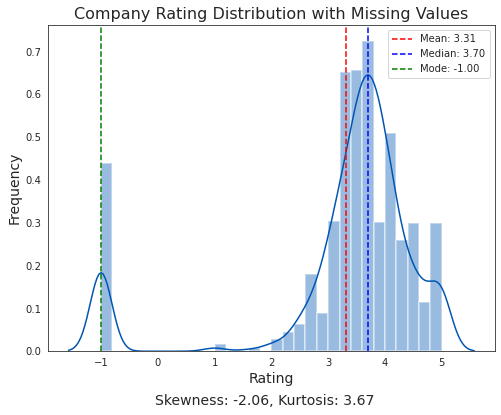

In [26]:
plot_distribution(data_glassdoor.company_rating, "Company Rating Distribution with Missing Values", "Rating", "Frequency", bins = 30)

- Since the company_rating feature has a more or less normal distribution, it will be appropriate to replace -1 values with the mean of the distribution

In [27]:
data_glassdoor.company_rating = data_glassdoor.company_rating.apply(lambda x: np.NaN if x == -1 else x)
data_glassdoor.company_rating = data_glassdoor.company_rating.fillna(data_glassdoor.company_rating.mean())

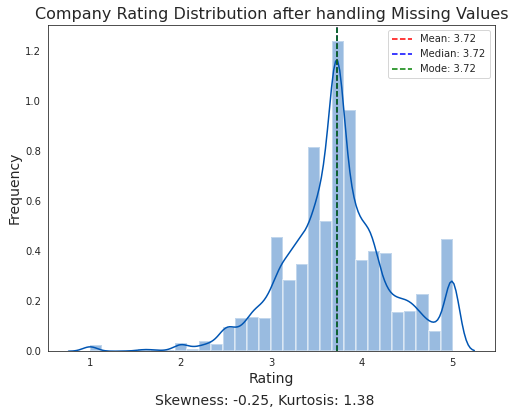

In [28]:
plot_distribution(data_glassdoor.company_rating, "Company Rating Distribution after handling Missing Values", "Rating", "Frequency", bins = 30)

- The Skewness and Kurtosis levels have improved significantly and our distribution looks more normal

- We can then continue with the missing values in the founding_year column

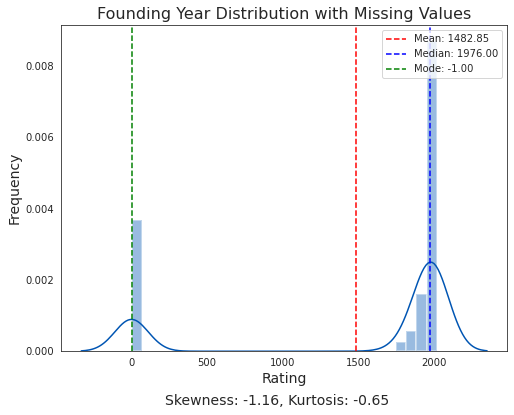

In [29]:
plot_distribution(data_glassdoor.founding_year, "Founding Year Distribution with Missing Values", "Rating", "Frequency", bins = 30)

- We can clearly see that this is a right-skewed distribution and it will be preferable to replace the missing values with the median of the distribution

In [30]:
data_glassdoor.founding_year = data_glassdoor.founding_year.apply(lambda x: np.NaN if x == -1 else x)
data_glassdoor.founding_year = data_glassdoor.founding_year.fillna(data_glassdoor.founding_year.median())

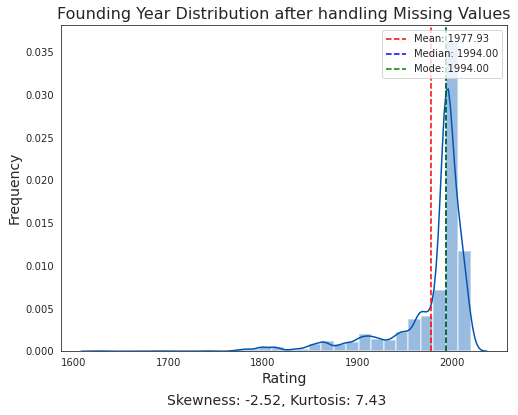

In [31]:
plot_distribution(data_glassdoor.founding_year, "Founding Year Distribution after handling Missing Values", "Rating", "Frequency", bins = 30)

- Our distribution is even more skewed now, and we will have to normalize it for modeling later

- It would be a good idea to check the situation with the outliers here as well

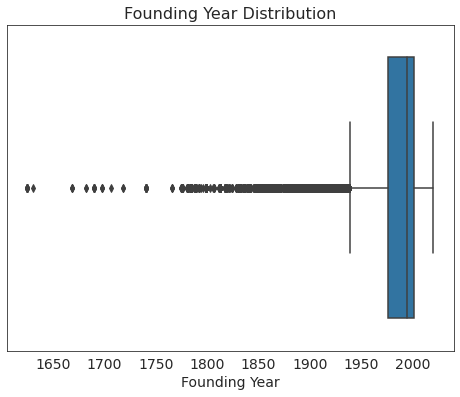

In [32]:
plt.figure(figsize = (8, 6))
sns.boxplot(data_glassdoor.founding_year)

plt.title("Founding Year Distribution", size = 16)
plt.xlabel("Founding Year", fontsize = 14)
plt.xticks(fontsize = 14)

plt.show()

The boxplot shows us that there are many outliers in the founding_year feature. 

- In consequence, the mean value will be definitely biased towards those outliers

<br>

#### We should also see if there are missing values in the categorical features

In [33]:
data_glassdoor[data_glassdoor.company_revenue == "Unknown"].value_counts().sum()

0

In [34]:
data_glassdoor[data_glassdoor.company_revenue == "-1"]

,salary_estimate,job_description,company_rating,job_location,company_size,founding_year,type_of_ownership,company_industry,company_revenue,job_position,seniority_level
88,85-135,Our client is conducting a search for an exper...,3.723929,"New York, NY",-1,1994.0,-1,-1,-1,Data Analyst,na
115,85-135,TSR is a premier National U.S. Staffing compan...,3.723929,"New York, NY",-1,1994.0,-1,-1,-1,Data Analyst,na
117,85-135,Title: Business Analyst II\nDuration: 6+ Month...,3.723929,"New York, NY",-1,1994.0,-1,-1,-1,Data Analyst,na
119,45-82,Our client portfolio includes leading luxury f...,3.723929,"New York, NY",-1,1994.0,-1,-1,-1,Data Analyst,na
147,45-82,The Senior Data Analysts will be responsible f...,3.723929,"Whippany, NJ",-1,1994.0,-1,-1,-1,Data Analyst,Senior
...,...,...,...,...,...,...,...,...,...,...,...
26886,52-94,Job Description\nWe are seeking an upper-mid-l...,3.723929,"Columbus, OH",-1,1994.0,-1,-1,-1,Machine Learning Engineer,na
26896,52-94,"Helping patients, pathologists and physicians ...",3.723929,"Columbus, OH",-1,1994.0,-1,-1,-1,Data Engineer,na
26908,55-113,"Greetings,\n\nJob Title- Data Engineer ( Netez...",3.723929,"Columbus, OH",-1,1994.0,-1,-1,-1,Data Engineer,na
26958,55-112,RESPONSIBILITIES Kforce has a client in search...,3.723929,"Columbus, OH",-1,1994.0,-1,-1,-1,Data Engineer,na


- Here we can see that there is a tendency. The observations with missing company_revenue values also tend to have other missing values that are important to our research

- Furthermore, we can choose to remove those 1324 rows, as this would not affect our data too significantly

In [35]:
data_glassdoor = data_glassdoor[~data_glassdoor.company_revenue.str.contains("-1")]

- Let's now check our company_industry columns as well

In [36]:
data_glassdoor[data_glassdoor.company_industry == "Unknown"].value_counts().sum()

0

In [37]:
data_glassdoor[data_glassdoor.company_industry == "-1"].value_counts().sum()

2145

- There are 2145 missing values here, which we can also remove, so we are only left with values that are showing something

In [38]:
data_glassdoor = data_glassdoor[~data_glassdoor.company_industry.str.contains("-1")]

In [39]:
data_glassdoor[data_glassdoor.type_of_ownership == "-1"].value_counts().sum()

0

- type_of_ownership column looks fine

In [40]:
data_glassdoor[data_glassdoor.company_size == "Unknown"].value_counts().sum()

130

In [41]:
data_glassdoor[data_glassdoor.company_size == "-1"].value_counts().sum()

0

- There are 130 "Unknown" values here, and for the sake of making things easier we will just remove them.

In [42]:
data_glassdoor = data_glassdoor[~data_glassdoor.company_size.str.contains("Unknown")]

In [43]:
data_glassdoor.shape

(23193, 11)

- We are left with 23193 observations and we can now continue to the next step

#### Step 4. Feature Engineering:

- Let's create three new columns containing the min, max, and average estimate salary

- Convert the numerical values into integers

- Drop the initial "estimate_salary" column

In [44]:
data_glassdoor["min_salary_usd"] = data_glassdoor.salary_estimate.apply(lambda x: x.split("-")[0])
data_glassdoor["max_salary_usd"] = data_glassdoor.salary_estimate.apply(lambda x: x.split("-")[1])

data_glassdoor.min_salary_usd = pd.to_numeric(data_glassdoor.min_salary_usd, errors = "coerce", downcast = "unsigned")
data_glassdoor.max_salary_usd = pd.to_numeric(data_glassdoor.max_salary_usd, errors = "coerce", downcast = "unsigned")

data_glassdoor.min_salary_usd = data_glassdoor.min_salary_usd.apply(lambda x: x * 1000)
data_glassdoor.max_salary_usd = data_glassdoor.max_salary_usd.apply(lambda x: x * 1000)

data_glassdoor["avg_salary_usd"] = data_glassdoor[["min_salary_usd", "max_salary_usd"]].mean(axis = 1).astype(np.unsignedinteger)

data_glassdoor.drop(["salary_estimate"], axis = 1, inplace = True)

- Create a separate column containing only the job's state

In [45]:
data_glassdoor['job_state'] = data_glassdoor.job_location.str.extract('(\\b[A-Z_]{2})').fillna('')

In [46]:
data_glassdoor.job_state.unique()

array(['NY', 'NJ', 'CA', 'IL', 'TX', 'AZ', 'DC', 'AF', 'PA', 'DE', 'FL',
       'IN', 'OH', 'NC', 'SC', 'UT', 'VA', 'WA', 'GA', 'KS', 'CO', 'MD',
       'MA', 'TN', 'MI', 'OK', 'OR', 'NV', 'KY', 'WI', 'NM', 'MO', 'NE',
       'MN', 'LA', 'HI', 'AK', '', 'VT', 'US'], dtype=object)

- We can see that there are several observations that are an empty string and "US". We can see if they are too much, and if not, remove them

In [47]:
data_glassdoor[data_glassdoor.job_state == ""].value_counts().sum()

194

In [48]:
data_glassdoor[data_glassdoor.job_state == "US"].value_counts().sum()

1

- 195 observations in total, they can be removed without affecting our data too much

In [49]:
data_glassdoor = data_glassdoor.loc[~data_glassdoor.job_state.isin(["", "US"])]

In [50]:
data_glassdoor.job_state.unique()

array(['NY', 'NJ', 'CA', 'IL', 'TX', 'AZ', 'DC', 'AF', 'PA', 'DE', 'FL',
       'IN', 'OH', 'NC', 'SC', 'UT', 'VA', 'WA', 'GA', 'KS', 'CO', 'MD',
       'MA', 'TN', 'MI', 'OK', 'OR', 'NV', 'KY', 'WI', 'NM', 'MO', 'NE',
       'MN', 'LA', 'HI', 'AK', 'VT'], dtype=object)

We can also calculate the company_age and use it instead of the founding year

- Convert the values into integers
    
- Drop the founding_year column

In [51]:
data_glassdoor["company_age"] = data_glassdoor.founding_year.apply(lambda x: 2022 - x).astype(np.unsignedinteger)

data_glassdoor.drop("founding_year", axis = 1, inplace = True)

- Let's explore the type_of_ownership column a bit more and see what can be improved

In [52]:
data_glassdoor.type_of_ownership.value_counts()

Private                           12343
Public                             6938
Subsidiary or Business Segment     1161
Nonprofit Organization             1037
Government                          605
College / University                321
Hospital                            162
Private Practice / Firm             108
Contract                            107
Other Organization                   75
Unknown                              69
School / School District             24
Franchise                            14
Self-employed                         6
Name: type_of_ownership, dtype: int64

- We can remove the "Unknown" and "Other Organization" observations. There are not too much and they wouldn't be usable

In [53]:
data_glassdoor = data_glassdoor[~data_glassdoor.type_of_ownership.str.contains("Unknown")]
data_glassdoor = data_glassdoor[~data_glassdoor.type_of_ownership.str.contains("Other Organization")]

- And last, but not least, let's create new features that show if one of the top Data Science requirements are in the current job position

In [54]:
data_glassdoor["python_job"] = data_glassdoor.job_description.apply(lambda x: 1 if "python" in x.lower() else 0)
data_glassdoor["rstudio_job"] = data_glassdoor.job_description.apply(lambda x: 1 if "studio" in x.lower() else 0)
data_glassdoor["sql_job"] = data_glassdoor.job_description.apply(lambda x: 1 if "sql" in x.lower() else 0)
data_glassdoor["excel_job"] = data_glassdoor.job_description.apply(lambda x: 1 if "excel" in x.lower() else 0)
data_glassdoor["tableau_job"] = data_glassdoor.job_description.apply(lambda x: 1 if "tableau" in x.lower() else 0)
data_glassdoor["ml_job"] = data_glassdoor.job_description.apply(lambda x: 1 if "machine learning" in x.lower() else 0)
data_glassdoor["dl_job"] = data_glassdoor.job_description.apply(lambda x: 1 if "deep learning" in x.lower() else 0)
data_glassdoor["spark_job"] = data_glassdoor.job_description.apply(lambda x: 1 if "spark" in x.lower() else 0)
data_glassdoor["hadoop_job"] = data_glassdoor.job_description.apply(lambda x: 1 if "hadoop" in x.lower() else 0)
data_glassdoor["tensorflow_job"] = data_glassdoor.job_description.apply(lambda x: 1 if "tensorflow" in x.lower() else 0)

- We can now drop the job_description column, as we are not going to use it further

In [55]:
data_glassdoor.drop("job_description", axis = 1, inplace = True)

- and let's have a final look at our cleaned dataset

In [56]:
data_glassdoor.head()

,company_rating,job_location,company_size,type_of_ownership,company_industry,company_revenue,job_position,seniority_level,min_salary_usd,max_salary_usd,...,python_job,rstudio_job,sql_job,excel_job,tableau_job,ml_job,dl_job,spark_job,hadoop_job,tensorflow_job
0,3.9,"New York, NY",10000+,Nonprofit Organization,Health Care Services & Hospitals,$2 to $5 billion,Data Analyst,na,56000.0,102000,...,0,0,0,1,0,0,0,0,0,0
1,3.8,"New York, NY",1 to 50,Private,Venture Capital & Private Equity,Unknown / Non-Applicable,Data Analyst,na,56000.0,102000,...,0,0,0,1,0,0,0,0,0,0
2,3.6,"Florham Park, NJ",501 to 1000,Private,Biotech & Pharmaceuticals,$5 to $10 million,Data Analyst,na,56000.0,102000,...,0,0,1,1,0,0,0,0,0,0
3,3.6,"Franklin Lakes, NJ",10000+,Public,Health Care Products Manufacturing,$10+ billion,Data Analyst,na,56000.0,102000,...,0,0,0,0,0,0,0,0,0,0
4,3.4,"New York, NY",201 to 500,Public,Internet,$100 to $500 million,Data Analyst,na,56000.0,102000,...,0,0,0,1,1,0,0,0,0,0


In [57]:
data_glassdoor.shape

(22826, 23)

- And save the cleaned data into a new .csv file

In [58]:
data_glassdoor.to_csv("data/data_us_cleaned.csv")

- looks ready, now let's clean and process the other dataset that we are going to use

<br></br>
#### Let's first import and explore our second dataset:

In [59]:
data_reed = pd.read_csv("data/deduped-jobs.csv")

In [60]:
data_reed.head()

,reference,title,date_posted,date_ending,advertiser,location,city,country,salary,salary_min,salary_max,salary_frequency,salary_currency,description
0,41857664,Data Science Manager,2021-01-26,2021-03-09T23:55:00.0000000,Charles Simon Associates Ltd,London,Camden,GB,70000.0,70000.0,80000.0,YEAR,NaN,"Apply now\nData Science Manager (Data, Python,..."
1,41924233,Data Science Recruiter,2021-02-03,2021-03-03T23:55:00.0000000,Crone Corkill,South East England,London,GB,20000.0,20000.0,26000.0,YEAR,NaN,"Apply now\nData Science Recruiter - £20,000-£2..."
2,41752222,Data Science Lead,2021-01-14,2021-02-25T23:55:00.0000000,Harnham,South East England,London,GB,75000.0,75000.0,80000.0,YEAR,NaN,"Apply now\nDATA SCIENCE LEAD\nUP TO £80,000 + ..."
3,41642513,Data Science Consultant,2020-12-27,2021-02-07T23:55:00.0000000,QUINTON DAVIES LIMITED,Avon,Bristol,GB,35000.0,35000.0,65000.0,YEAR,NaN,Apply now\nQuinton Davies have been engaged by...
4,41764338,Data Science Manager,2021-01-15,2021-02-26T23:55:00.0000000,Data Idols,South East England,London,GB,100000.0,100000.0,120000.0,YEAR,NaN,Apply now\nData Science Manager\n\nData Idols ...


In [61]:
data_reed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   reference         595 non-null    int64  
 1   title             595 non-null    object 
 2   date_posted       595 non-null    object 
 3   date_ending       595 non-null    object 
 4   advertiser        595 non-null    object 
 5   location          595 non-null    object 
 6   city              595 non-null    object 
 7   country           595 non-null    object 
 8   salary            595 non-null    float64
 9   salary_min        595 non-null    float64
 10  salary_max        595 non-null    float64
 11  salary_frequency  595 non-null    object 
 12  salary_currency   0 non-null      float64
 13  description       595 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 65.2+ KB


In [62]:
data_reed.describe().T

,count,mean,std,min,25%,50%,75%,max
reference,595.0,4.178603e+07,129825.020299,40987456.0,41708664.5,41793743.0,41894848.0,41953685.0
salary,595.0,5.703777e+04,21730.281996,10000.0,40000.0,55000.0,70000.0,150000.0
salary_min,595.0,5.703777e+04,21730.281996,10000.0,40000.0,55000.0,70000.0,150000.0
salary_max,595.0,7.258629e+04,37994.233441,10000.0,55000.0,70000.0,85000.0,750000.0
salary_currency,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Key Findings:

- We have 595 observations of 14 features

- There are some features that we wouldn't need for our exploration, so we can remove them.

- There are 4 numerical columns and one NaN which we will remove, as we know from the metadata that the currency is USD.

- Salary frequency is only yearly, so we can remove that column too.

- The date_ending column would be removed, as it isn't needed. Same as the reference feature.

- We can try to use only the columns that are relevant to the ones from our previous dataset

- The dataset is pretty much clean, but we can convert the floats into ints to match our previous dataset.

<br></br>

#### Step 1. Feature Selection

In [63]:
data_reed = data_reed[[
    "title", 
    "advertiser", 
    "city",
    "salary_min",
    "salary_max",
    "description"
]]

- Let's rename the columns again

In [64]:
data_reed.rename(
    columns = {
    "title": "job_title",
    "advertiser": "company_name",
    "city": "job_location",
    "description": "job_description",
    "salary_min": "min_salary_gbp",
    "salary_max": "max_salary_gbp"
}, 
    inplace = True, 
    errors = 'raise'
)

In [65]:
data_reed.head()

,job_title,company_name,job_location,min_salary_gbp,max_salary_gbp,job_description
0,Data Science Manager,Charles Simon Associates Ltd,Camden,70000.0,80000.0,"Apply now\nData Science Manager (Data, Python,..."
1,Data Science Recruiter,Crone Corkill,London,20000.0,26000.0,"Apply now\nData Science Recruiter - £20,000-£2..."
2,Data Science Lead,Harnham,London,75000.0,80000.0,"Apply now\nDATA SCIENCE LEAD\nUP TO £80,000 + ..."
3,Data Science Consultant,QUINTON DAVIES LIMITED,Bristol,35000.0,65000.0,Apply now\nQuinton Davies have been engaged by...
4,Data Science Manager,Data Idols,London,100000.0,120000.0,Apply now\nData Science Manager\n\nData Idols ...


### This dataset has been cleaned previously so we can proceed directly with:

### Step. 2 Feature Extraction

- Let's first create an avg_estimate_salary column

In [66]:
data_reed.min_salary_gbp = pd.to_numeric(data_reed.min_salary_gbp, errors = "coerce", downcast = "unsigned")
data_reed.max_salary_gbp = pd.to_numeric(data_reed.max_salary_gbp, errors = "coerce", downcast = "unsigned")

data_reed["avg_salary_gbp"] = data_reed[["min_salary_gbp", "max_salary_gbp"]].mean(axis = 1).astype(np.int32)

- Now we are ready to create new features that show if one of the top Data Science requirements are in the current job position.

In [67]:
data_reed["python_job"] = data_reed.job_description.apply(lambda x: 1 if "python" in x.lower() else 0)
data_reed["rstudio_job"] = data_reed.job_description.apply(lambda x: 1 if "studio" in x.lower() else 0)
data_reed["sql_job"] = data_reed.job_description.apply(lambda x: 1 if "sql" in x.lower() else 0)
data_reed["excel_job"] = data_reed.job_description.apply(lambda x: 1 if "excel" in x.lower() else 0)
data_reed["tableau_job"] = data_reed.job_description.apply(lambda x: 1 if "tableau" in x.lower() else 0)
data_reed["ml_job"] = data_reed.job_description.apply(lambda x: 1 if "machine learning" in x.lower() else 0)
data_reed["dl_job"] = data_reed.job_description.apply(lambda x: 1 if "deep learning" in x.lower() else 0)
data_reed["spark_job"] = data_reed.job_description.apply(lambda x: 1 if "spark" in x.lower() else 0)
data_reed["hadoop_job"] = data_reed.job_description.apply(lambda x: 1 if "hadoop" in x.lower() else 0)
data_reed["tensorflow_job"] = data_reed.job_description.apply(lambda x: 1 if "tensorflow" in x.lower() else 0)

- Let's drop the job_description

In [68]:
data_reed.drop("job_description", axis = 1, inplace = True)

- We can also reuse the extract_position and extract_seniority functions and create corresponding features as we did previously.

In [69]:
data_reed["job_position"] = data_reed.job_title.apply(extract_position)

In [70]:
data_reed.job_position.value_counts()

na                           207
Data Scientist               139
Data Engineer                118
Data Analyst                  61
Manager                       44
Data Architect                14
Machine Learning Engineer      8
Recruiter                      3
Deep Learning Engineer         1
Name: job_position, dtype: int64

In [71]:
data_reed["seniority_level"] = data_reed.job_title.apply(extract_seniority)

In [72]:
data_reed.seniority_level.value_counts()

na          321
Senior      217
Manager      34
Director     12
Junior       10
Trainee       1
Name: seniority_level, dtype: int64

- We can now drop the job_title feature, as we are not going to need it anymore, and have a final look at our dataset, then save the cleaned version

In [73]:
data_reed.drop("job_title", axis = 1, inplace = True)

In [74]:
data_reed.head()

,company_name,job_location,min_salary_gbp,max_salary_gbp,avg_salary_gbp,python_job,rstudio_job,sql_job,excel_job,tableau_job,ml_job,dl_job,spark_job,hadoop_job,tensorflow_job,job_position,seniority_level
0,Charles Simon Associates Ltd,Camden,70000,80000,75000,1,0,1,0,1,0,0,1,0,0,Manager,Manager
1,Crone Corkill,London,20000,26000,23000,0,0,0,1,0,0,0,0,0,0,Recruiter,na
2,Harnham,London,75000,80000,77500,1,0,1,0,0,1,0,1,0,0,na,Senior
3,QUINTON DAVIES LIMITED,Bristol,35000,65000,50000,1,0,0,0,0,0,0,0,0,0,na,na
4,Data Idols,London,100000,120000,110000,0,0,0,0,0,1,0,0,0,0,Manager,Manager


In [75]:
data_reed.to_csv("data/data_reed_cleaned.csv")


With this, the data cleaning and processing of this dataset has been completed.

<br>

<br>

# Exploratory Data Analysis

### Plotting and investigating our numerical and categorical features respectively

#### Let's start by importing our cleaned US data

In [76]:
data_us = pd.read_csv("data/data_us_cleaned.csv")

In [77]:
data_us.head()

,Unnamed: 0,company_rating,job_location,company_size,type_of_ownership,company_industry,company_revenue,job_position,seniority_level,min_salary_usd,...,python_job,rstudio_job,sql_job,excel_job,tableau_job,ml_job,dl_job,spark_job,hadoop_job,tensorflow_job
0,0,3.9,"New York, NY",10000+,Nonprofit Organization,Health Care Services & Hospitals,$2 to $5 billion,Data Analyst,na,56000.0,...,0,0,0,1,0,0,0,0,0,0
1,1,3.8,"New York, NY",1 to 50,Private,Venture Capital & Private Equity,Unknown / Non-Applicable,Data Analyst,na,56000.0,...,0,0,0,1,0,0,0,0,0,0
2,2,3.6,"Florham Park, NJ",501 to 1000,Private,Biotech & Pharmaceuticals,$5 to $10 million,Data Analyst,na,56000.0,...,0,0,1,1,0,0,0,0,0,0
3,3,3.6,"Franklin Lakes, NJ",10000+,Public,Health Care Products Manufacturing,$10+ billion,Data Analyst,na,56000.0,...,0,0,0,0,0,0,0,0,0,0
4,4,3.4,"New York, NY",201 to 500,Public,Internet,$100 to $500 million,Data Analyst,na,56000.0,...,0,0,0,1,1,0,0,0,0,0


In [78]:
data_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22826 entries, 0 to 22825
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         22826 non-null  int64  
 1   company_rating     22826 non-null  float64
 2   job_location       22826 non-null  object 
 3   company_size       22826 non-null  object 
 4   type_of_ownership  22826 non-null  object 
 5   company_industry   22826 non-null  object 
 6   company_revenue    22826 non-null  object 
 7   job_position       22826 non-null  object 
 8   seniority_level    22826 non-null  object 
 9   min_salary_usd     22815 non-null  float64
 10  max_salary_usd     22826 non-null  int64  
 11  avg_salary_usd     22826 non-null  int64  
 12  job_state          22826 non-null  object 
 13  company_age        22826 non-null  int64  
 14  python_job         22826 non-null  int64  
 15  rstudio_job        22826 non-null  int64  
 16  sql_job            228

For some reason, our "Unnamed: 0" column came back from the dead, after being deleted in the previous notebook, so let's remove it again :) 

In [79]:
data_us.drop("Unnamed: 0", axis = 1, inplace = True)

#### Now let's continue by first exploring our numerical variables individually

- Starting with one of the key features - avg_salary_usd

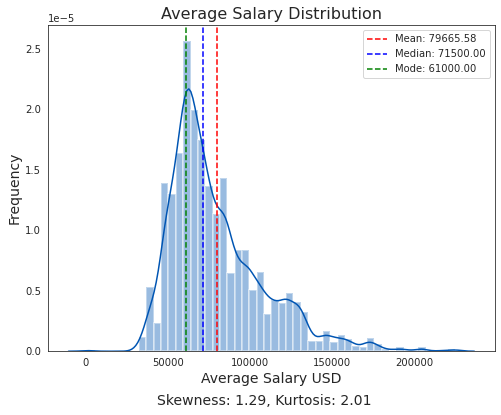

In [80]:
plot_distribution(data_us.avg_salary_usd, "Average Salary Distribution", "Average Salary USD", "Frequency", bins = 50)

#### Key Findings:

- As we can clearly see, we have a positively skewed distribution and this will make it difficult to assign a typical value as there is no clear center point on a right-skewed graph

- Although there are no official rules about cut-off criteria to decide just how large skewness or kurtosis values must be to indicate non-normality, we can accept some common opinion that values between +/- 1 for skewness and +/- 3 for kurtosis are considered as the range of normality

- Being so, our salary estimate data is considered highly skewed and it better be transformed if applying in a model

- Kurtosis lesser than 3 is considered platykurtic. If we note that fluctuations represent the riskiness of a feature. More fluctuations represent more risk and vice versa. Therefore, platykurtic returns are less risky than leptokurtic (kurtosis > 3) returns

- We can consider that the median (71,500 USD) is the average expected salary of all the averages in this feature

- The most frequent average salary (61,000 USD) corresponds to the mode of the column

<br>

#### Let's explore the minimum salary

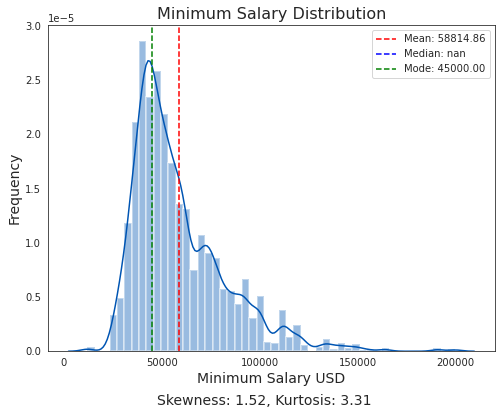

In [81]:
plot_distribution(data_us.min_salary_usd, "Minimum Salary Distribution", "Minimum Salary USD", "Frequency", bins = 50)

#### Key Findings:

- As we can clearly see, we have a positively skewed distribution and this will make it difficult to assign a typical value as there is no clear center point on a right-skewed graph

- Our salary estimate chart is considered highly skewed and it better be normalized if applying in a model

- This feature is leptokurtic, therefore it has greater probability for negative returns farther from the mean on the left side of the distribution and leads to a higher value at risk.

- We can consider that the median (52,000 USD) is the close to the expected minimum salary in this feature

- The most frequent minimum salary (45,000 USD) corresponds to the mode of the column

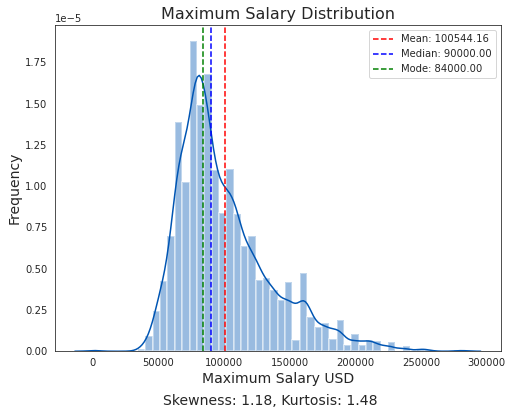

In [82]:
plot_distribution(data_us.max_salary_usd, "Maximum Salary Distribution", "Maximum Salary USD", "Frequency", bins = 50)

#### Key Findings:

- Even though this chart shows the best approximation to normal distribution compared to the previous, it is considered highly skewed and it will need transformation for modeling

- The median 90,000 USD can be considered as the expected average of maximum salary

- The mode 84,000 USD confirms that the most frequent maximum salary is in the nearby range

#### Exploration of the Company Rating feature

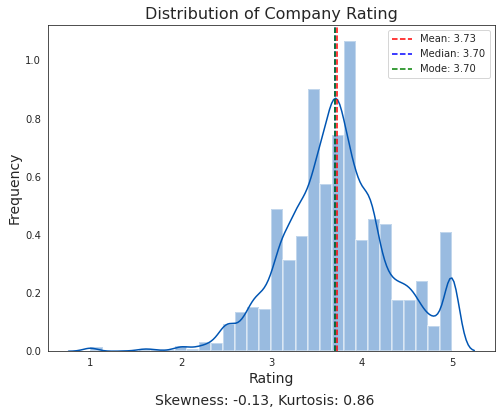

In [83]:
plot_distribution(data_us.company_rating, "Distribution of Company Rating", "Rating", "Frequency", bins = 30)

#### Key Findings:

- We can confidently say that the most common company rating is around 3.70

- Here our distribution appears very close to normal. Skewness and Kurtosis values are definitely in the range of normality

But there is some significant distortion in the right, and it will be good to check how close it resembles a normal distribution. For this we can perform a Shapiro-Wilk Test (normality test) that is designed to detect all departures from normality:


* $H_0:$ Sample looks Gaussian (fail to reject $H_0$)
* $H_1:$ Sample does not look Gaussian (reject $H_0$)

In [84]:
def test_normality(data):
    """
    Tests normality of a distribution
    """
    stat, p_value = shapiro(data)
    alpha = 0.05
    
    print(f"Statistics = {stat:.3f}, p-value = {p_value:.3f}")

    if p_value > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

In [85]:
test_normality(data_us.company_rating)

Statistics = 0.979, p-value = 0.000
Sample does not look Gaussian (reject H0)


- It appears that our test shows that the outliers are significant, and we will most probably have to normalize this feature for modeling

<br></br>

#### Now let's explore our third numerical feature - company_age

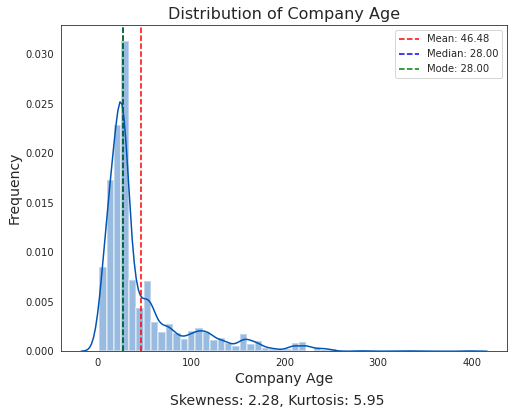

In [86]:
plot_distribution(data_us.company_age, "Distribution of Company Age", "Company Age", "Frequency", bins = 50)

#### Key Findings:

- Again, we have even more positively skewed distribution here

- Our Company Age data is highly skewed and it better be normalized if applying in a model

- We can consider that the median (28 years) is the average age in this dataset

- The most frequent age is also 28 years

<br></br>

#### Now it would be a good idea to observe the correlations between the numerical variables

- Let's start by creating a reusable function and see where it goes...

In [87]:
def plot_heatmap(data, title, fig_size):
    """
    Plots a correlation heatmap
    """
    plt.figure(figsize = fig_size)
    sns.heatmap(data.corr(), cmap = colors, square = True, linewidths = 1, vmin = -1, annot = True)
    
    plt.title(title, fontsize = 16)
    plt.show()

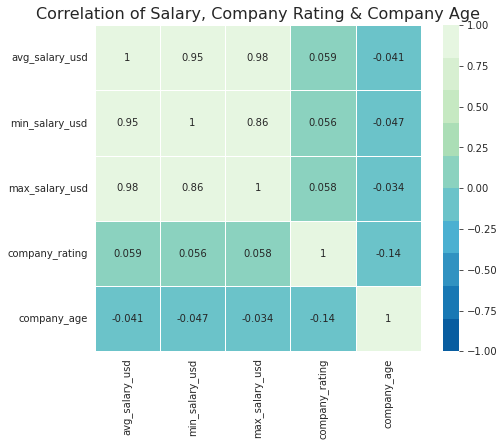

In [88]:
plot_heatmap(data_us[["avg_salary_usd", "min_salary_usd", "max_salary_usd", "company_rating", "company_age"]], "Correlation of Salary, Company Rating & Company Age", (8, 6))

#### Key Findings:

- A significant correlation is considered a value higher than 0.7 or lower than -0.7

- Therefore, we can conclude that there is no important correlation between the salary, the rating of the company and the age

- The high correlation between the different salaries is more than expected, but it doesn't really show us more than what we already know

#### Now let's explore our categorical features

- Starting with the creation of a function to reuse, and exploring the top 10 states in job_state

In [89]:
def plot_top10_countplot(data, fig_size, title, x_label, y_label):
    """
    Plots the count of the top 10 observations
    """
    plt.figure(figsize = fig_size)
    sns.countplot(data,order = pd.value_counts(data).iloc[:10].index, palette = colors)

    plt.title(title, fontsize = 16)
    plt.xlabel(x_label, fontsize = 14)
    plt.ylabel(y_label, fontsize = 14)

    plt.show()

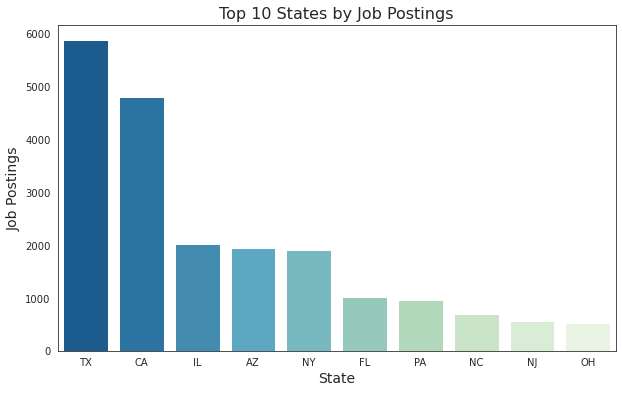

In [90]:
plot_top10_countplot(data_us.job_state, (10, 6), "Top 10 States by Job Postings", "State", "Job Postings")

#### Key Findings:

- We all know that California has a high demand for all kinds of tech jobs, but here we can see that Texas holds the first place by a significant difference. Why would that be?

- After investigating the Web, we can discover that the Texan market is looking increasingly lucrative for both young start-ups and established tech companies alike. One of the most significant factors in this rapid growth is the favourable tax conditions in the state. There’s no corporate or individual income tax, with Texas ranking 47 out of 50 states when it comes to taxes paid per $1,000 of personal income. As California tax rates hitting up to 10.84 for corporations and 12.3% for individuals, it’s understandable that entrepreneurs and big business alike are looking to the southern state for bigger breaks on tax day

- On top of this, Texas offers favourable funding and regulatory conditions for young and growing businesses, providing a ‘pro-business’ environment for corporations to thrive. Texas State offers billions of dollars in incentives to businesses every year, providing all the more reasons for those in the technology industry to think hard about making the move


- With Chicago being ranked as one of the top 10 tech ecosystems across the world, makes sense that Illinois will have the 3rd position

- Arizona has evolved into a premier destination for technology, one that's rapidly growing. Since 2015, Arizona has added more than 38,000 tech jobs, bringing total employment in the tech industry to more than 255,000. As new startups have sprouted and expanded, capital has poured into the state.

- Surprisingly New York is on 5th position, even though a big number of the Fortune 500 companies are having their headquarters there

<br>

#### Top 10 states by highest average salary:

- But first, another useful function

In [91]:
def plot_top10_barplot(data, grouped_by, feature, col_1, col_2, title, x_label, y_label, fig_size):
    """
    Plots Top 10 observations, grouped by selected feature
    """
    grouped_data = data.groupby(grouped_by)[feature].mean().nlargest(10).sort_values(ascending = False)
    grouped_data = grouped_data.reset_index()
    
    plt.figure(figsize = fig_size)
    sns.barplot(x = col_1, y = col_2, data = grouped_data, palette = colors)

    plt.title(title, size = 16)
    plt.xlabel(x_label, fontsize = 14)
    plt.ylabel(y_label, fontsize = 14)
    
    plt.show()

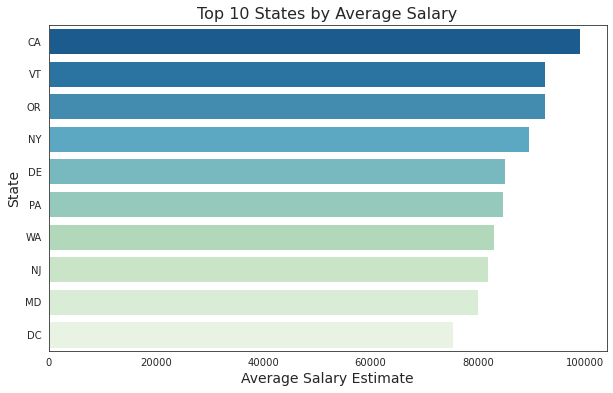

In [92]:
plot_top10_barplot(
    data_us, 
    grouped_by = "job_state",
    feature = "avg_salary_usd",
    col_1 = "avg_salary_usd", 
    col_2 = "job_state", 
    title = "Top 10 States by Average Salary",
    x_label = "Average Salary Estimate", 
    y_label = "State", 
    fig_size = (10, 6)
)

In [93]:
data_us.groupby("job_state")["avg_salary_usd"].mean().nlargest(10).sort_values(ascending = False)

job_state
CA    98997.183980
VT    92500.000000
OR    92444.444444
NY    89512.552301
DE    84937.500000
PA    84634.655532
WA    82987.261146
NJ    81806.737589
MD    79931.192661
DC    75278.846154
Name: avg_salary_usd, dtype: float64

- We can check the lowest average wages as well

In [94]:
data_us.groupby("job_state")["avg_salary_usd"].mean().nsmallest(10).sort_values(ascending = False)

job_state
GA    61109.289617
WI    59703.488372
SC    59537.037037
NE    57062.500000
NM    55500.000000
NV    53461.538462
IN    51121.621622
HI    49000.000000
KY    46129.032258
UT    37916.666667
Name: avg_salary_usd, dtype: float64

- Interesting here is that Texas is not in the top 10 states, and there is for sure at least one very solid reason behind it...

- At the time when our data was collected the minimum wage in Texas was 7.50 USD (remains the same in 2022), and in California was 12.00 USD (It is at 15 USD in 2022).

- So we can see that even though Texas offers more job positions, California is providing much higher salaries, and that is why it is still the most favorable choice for data professionals.

- The lowest minimum wages are in Utah, followed by Kentucky, Hawaii, Indiana, and Nevada. 

#### Let's check the minimum and maximum salaries

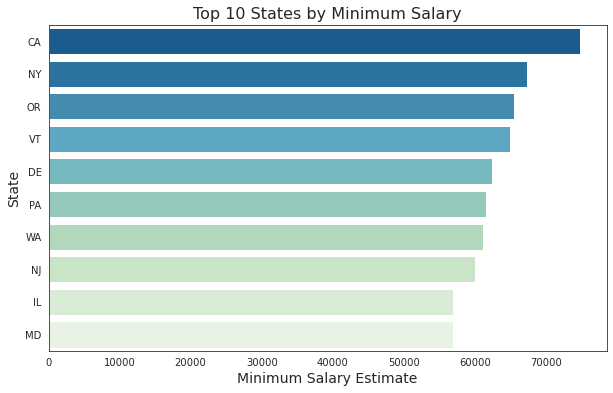

In [95]:
plot_top10_barplot(
    data_us, 
    grouped_by = "job_state",
    feature = "min_salary_usd",
    col_1 = "min_salary_usd", 
    col_2 = "job_state", 
    title = "Top 10 States by Minimum Salary",
    x_label = "Minimum Salary Estimate", 
    y_label = "State", 
    fig_size = (10, 6)
)

- Let's also see where the minimum wages are the lowest

In [96]:
data_us.groupby("job_state")["min_salary_usd"].mean().nlargest(10).sort_values(ascending = False)

job_state
CA    74796.829370
NY    67390.167364
OR    65518.518519
VT    65000.000000
DE    62375.000000
PA    61614.822547
WA    61155.844156
NJ    59994.680851
IL    56972.290945
MD    56963.302752
Name: min_salary_usd, dtype: float64

- Let's explore the lowest minimum salaries again

In [97]:
data_us.groupby("job_state")["min_salary_usd"].mean().nsmallest(10).sort_values(ascending = False)

job_state
MI    44206.349206
AK    44000.000000
GA    42710.382514
NE    42500.000000
NV    41692.307692
HI    40000.000000
NM    40000.000000
IN    39472.972973
KY    38296.296296
UT    26833.333333
Name: min_salary_usd, dtype: float64

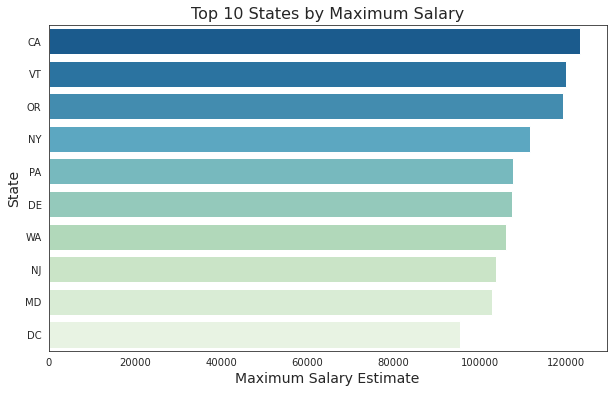

In [98]:
plot_top10_barplot(
    data_us, 
    grouped_by = "job_state",
    feature = "max_salary_usd",
    col_1 = "max_salary_usd", 
    col_2 = "job_state", 
    title = "Top 10 States by Maximum Salary",
    x_label = "Maximum Salary Estimate", 
    y_label = "State", 
    fig_size = (10, 6)
)

In [99]:
data_us.groupby("job_state")["max_salary_usd"].mean().nlargest(10).sort_values(ascending = False)

job_state
CA    123197.538590
VT    120000.000000
OR    119370.370370
NY    111634.937238
PA    107654.488518
DE    107500.000000
WA    105968.152866
NJ    103618.794326
MD    102899.082569
DC     95323.076923
Name: max_salary_usd, dtype: float64

- We can check out the lowest maximum salaries 

In [100]:
data_us.groupby("job_state")["max_salary_usd"].mean().nsmallest(10).sort_values(ascending = False)

job_state
KS    76071.428571
SC    74148.148148
WI    72918.604651
NE    71625.000000
NM    71000.000000
NV    65230.769231
IN    62770.270270
KY    58774.193548
HI    58000.000000
UT    49000.000000
Name: max_salary_usd, dtype: float64

- We can conclude that California dominates the job market with the highest minimum, maximum and average salaries, followed by Vermont and Oregon in the top 3

- Why Vermont and Oregon? Well, they also have minimum wage higher than 12 USD per hour and apparently there is demand for data professionals there

- The lowest minimum wages are in Utah, followed by Indiana, New Mexico, Hawaii, and Kentucky. Pretty much logical outcome, as those states are not very developed technologically

- The lowest maximum wages are in Utah, followed by Hawaii, Kentucky, Indiana, and Nevada

<br>

#### We can now continue exploring another important factor - the company's size

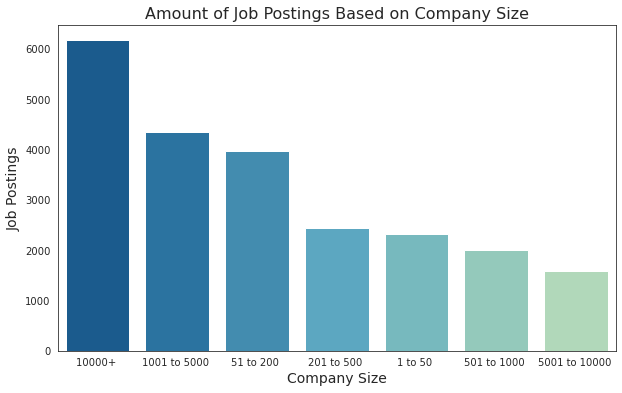

In [101]:
plot_top10_countplot(data_us.company_size, (10, 6), "Amount of Job Postings Based on Company Size", "Company Size", "Job Postings")

#### Key Findings:

- It's obvious that the largest companies have more job posts, but we can also see that the small (1 - 50 employees) and medium-sized companies (50 - 200 employees) offer a significant amount of data jobs. Of course, in order to survive in the market, smaller and medium sized companies MUST adapt the newest technologies and trends


- This clearly confirms that there is a huge demand of Data Professionals, no matter the size of the company

<br>


#### Performing Hypothesis Testing on Size vs. Salary

We want to prove whether if the company's size is correlated with the salary:

* $H_0:$ Company's size is not correlated with the salary.
* $H_1:$ Company's size is correlated with the salary.

In [102]:
def corr_test(x, y):
    """
    Returns the Pearson's correlation coefficient
    """
    try:
        r = round(pearsonr(x, y)[0], 4)
        print(f"Pearson correlation coefficient: {r}")
        p = round(pearsonr(x, y)[1], 4)
        print(f"P-value: {p}")
        
    except Exception as e:
        print(e)

In [103]:
company_size_factorized = pd.factorize(data_us.company_size)[0]

In [104]:
corr_test(company_size_factorized, data_us.avg_salary_usd)

Pearson correlation coefficient: -0.0198
P-value: 0.0028


Since the correlation coefficient is very close to 0, this tells us that there is almost no positive association between the two variables.

And since the corresponding p-value is less than .05, we conclude that there is a no statistically significant association between the two variables.

Therefore, we can reject $H_1$ and conclude that the size of the company is insignificant when it comes to the estimate salary range.

<br>


We can apply the same test to the minimum and the maximum estimate salary.

In [105]:
corr_test(company_size_factorized, data_us.min_salary_usd)

array must not contain infs or NaNs


In [106]:
data_us.min_salary_usd.isna().value_counts()

False    22815
True        11
Name: min_salary_usd, dtype: int64

- After an error in our code we discovered that there are a few NaN's in the min_salary_usd column and we can simply replace them with the mean value of this feature

In [107]:
data_us.min_salary_usd = data_us.min_salary_usd.fillna(data_us.min_salary_usd.mean())

In [108]:
corr_test(company_size_factorized, data_us.min_salary_usd)

Pearson correlation coefficient: -0.0142
P-value: 0.0322


The p-value here is less than 0.05%, which means that there is a very small statistically significant association between the variables.

Therefore, we can reject $H_1$ here and why not investigate a bit more.

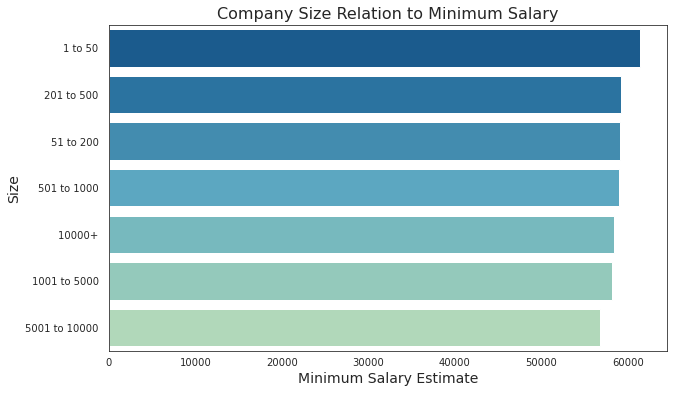

In [109]:
plot_top10_barplot(
    data_us, 
    grouped_by = "company_size",
    feature = "min_salary_usd",
    col_1 = "min_salary_usd", 
    col_2 = "company_size", 
    title = "Company Size Relation to Minimum Salary",
    x_label = "Minimum Salary Estimate", 
    y_label = "Size", 
    fig_size = (10, 6)
)

In [110]:
data_us.groupby("company_size")["min_salary_usd"].mean().sort_values(ascending = False)

company_size
1 to 50           61425.181399
201 to 500        59173.748408
51 to 200         59059.378959
501 to 1000       59021.407429
10000+            58445.687419
1001 to 5000      58163.944616
5001 to 10000     56803.544734
Name: min_salary_usd, dtype: float64

Now, this is interesting, apparently the smal and medium-sized companies have higher minimum salary average. And we must ask ourselves why would that be, knowing that their budget is way less limited. Well, exactly because of that:

- Gradually raising the minimum wage will result in reduced employee turnover and increased worker productivity, which will produce cost savings for small businesses that offset higher wage costs

<br>

How about the maximum estimate salary?

In [111]:
corr_test(company_size_factorized, data_us.max_salary_usd)

Pearson correlation coefficient: -0.022
P-value: 0.0009


Here we can reject $H_1$ as there is no statistically significant association. But still, let's explore a bit further...

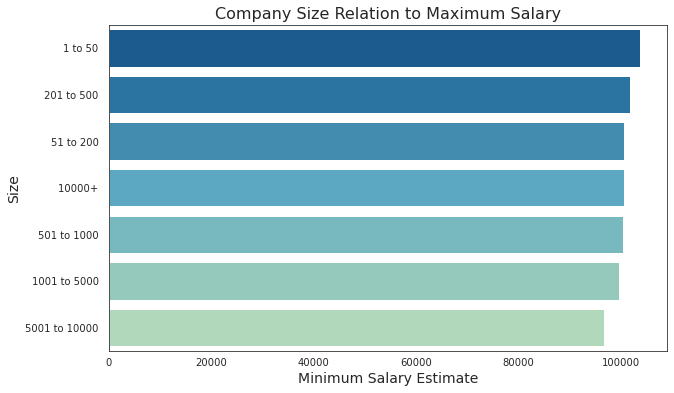

In [112]:
plot_top10_barplot(
    data_us, 
    grouped_by = "company_size",
    feature = "max_salary_usd",
    col_1 = "max_salary_usd", 
    col_2 = "company_size", 
    title = "Company Size Relation to Maximum Salary",
    x_label = "Minimum Salary Estimate", 
    y_label = "Size", 
    fig_size = (10, 6)
)

In [113]:
data_us.groupby("company_size")["max_salary_usd"].mean().sort_values(ascending = False)

company_size
1 to 50           103790.747946
201 to 500        101736.196319
51 to 200         100582.786471
10000+            100567.120623
501 to 1000       100399.000000
1001 to 5000       99567.983463
5001 to 10000      96643.939394
Name: max_salary_usd, dtype: float64

We can see the same phenomena here, the smallest companies offer the highest average max salary. 

- One possible reason for that can be that in order to compete for talents with the big companies, small companies are forced to offer better conditions to their employees.

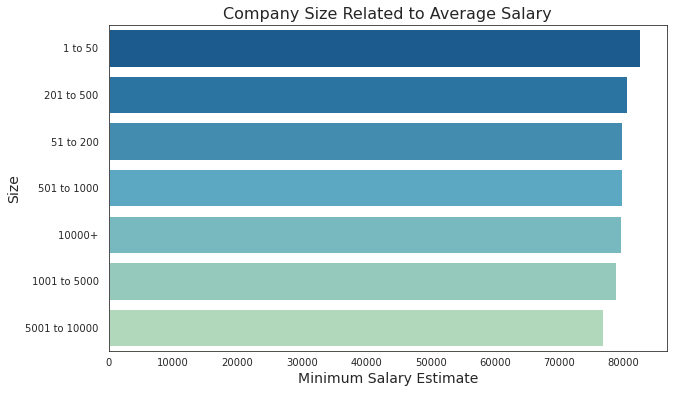

In [114]:
plot_top10_barplot(
    data_us, 
    grouped_by = "company_size",
    feature = "avg_salary_usd",
    col_1 = "avg_salary_usd", 
    col_2 = "company_size", 
    title = "Company Size Related to Average Salary",
    x_label = "Minimum Salary Estimate", 
    y_label = "Size", 
    fig_size = (10, 6)
)

In [115]:
data_us.groupby("company_size")["avg_salary_usd"].mean().sort_values(ascending = False)

company_size
1 to 50           82570.471249
201 to 500        80443.149284
51 to 200         79791.898031
501 to 1000       79695.750000
10000+            79506.404021
1001 to 5000      78859.324759
5001 to 10000     76705.492424
Name: avg_salary_usd, dtype: float64

Obviously, the average mean of the salary will show  nearly the results, confirming all the above.

<br>

#### Next, let's check the situation in the type_of_ownership feature

- Let's make it easier for the future plots with a function

In [116]:
def plot_top10_piechart(data, feature, title): 
    """
    Plots a pie chart with top 10 observations of selected feature
    """
    data[feature].value_counts().nlargest(10).plot(kind = "pie", figsize = (12, 11), labeldistance = None, autopct = "%.2f", colors = colors)
    
    plt.title(title, fontsize = 16)
    plt.legend(loc = "upper right")
    
    plt.show()

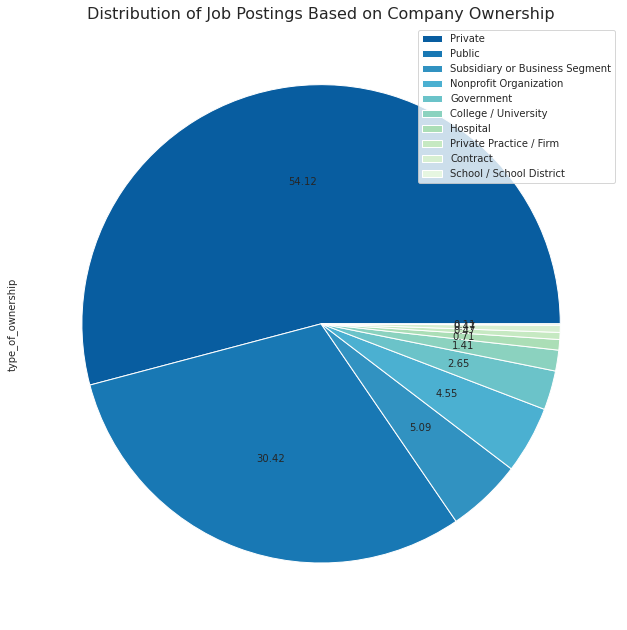

In [117]:
plot_top10_piechart(data_us, "type_of_ownership", "Distribution of Job Postings Based on Company Ownership")

#### Key Findings:

- The Private sector dominates the job market with more than 50% of the total job postings followed by the Public sector, with 30%, which is sort of expected

<br>

#### Hypothesis Testing on Type of Ownership vs. Salary:

$H_0:$ Company's type of ownership is not correlated with the salary

$H_1:$ Company's type of ownership is correlated with the salary

In [118]:
ownership_factorized = pd.factorize(data_us.type_of_ownership)[0]

In [119]:
corr_test(ownership_factorized, data_us.max_salary_usd)

Pearson correlation coefficient: -0.0248
P-value: 0.0002


$H_1$ rejected - no correlation of high significance

We can investigate this further by plotting the top 10 industries in the Private sector by number of job postings

In [120]:
private_sector = data_us[data_us.type_of_ownership == "Private"]

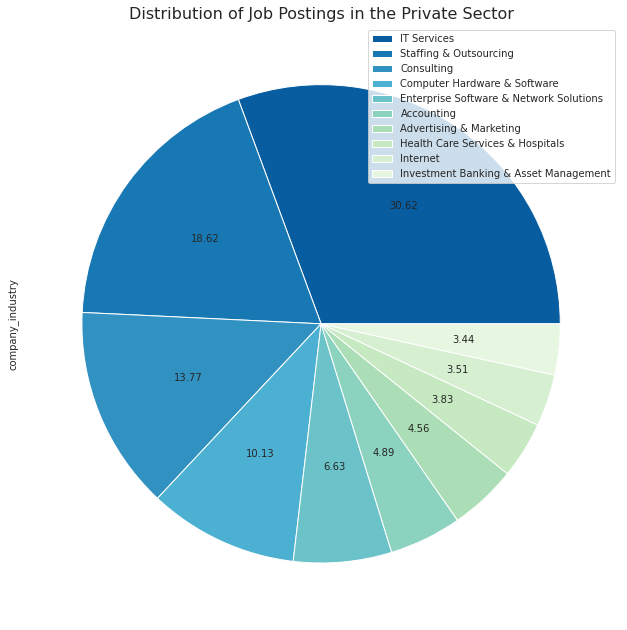

In [121]:
plot_top10_piechart(private_sector, "company_industry", "Distribution of Job Postings in the Private Sector")

#### Key Findings

- We can see that 30% of all private companies are in the IT Services, and if we add the Hardware & Software businesses and the Internet this will mean that 50% of all Private companies in this dataset are in the Tech business. This is not very surprising, even though we could've expect Retail to be in top 10 and also Investment & Banking to have higher percentage

- It's interesting that Outsorcing has the second position here, but it also makes sense, as that kind of business works with a lot of data

- Consulting has the 3rd place and this also comes to logic, bearing in mind that consulting firms gather the largest amount of their insight from Big Data

<br>

#### Let's also have a look at the average salary distribution in the Private sector


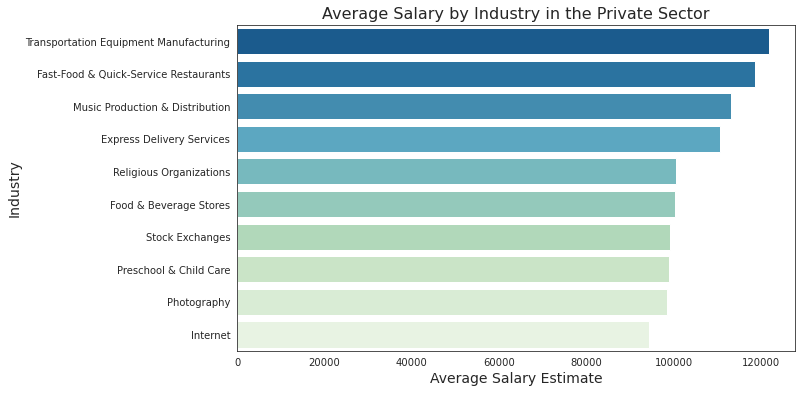

In [122]:
plot_top10_barplot(
    private_sector, 
    grouped_by = "company_industry",
    feature = "avg_salary_usd",
    col_1 = "avg_salary_usd", 
    col_2 = "company_industry", 
    title = "Average Salary by Industry in the Private Sector",
    x_label = "Average Salary Estimate", 
    y_label = "Industry", 
    fig_size = (10, 6)
)

In [123]:
private_sector.groupby("company_industry")["avg_salary_usd"].mean().nlargest(10).sort_values(ascending = False)

company_industry
Transportation Equipment Manufacturing    121714.285714
Fast-Food & Quick-Service Restaurants     118500.000000
Music Production & Distribution           113000.000000
Express Delivery Services                 110625.000000
Religious Organizations                   100500.000000
Food & Beverage Stores                    100350.000000
Stock Exchanges                            99090.909091
Preschool & Child Care                     99000.000000
Photography                                98500.000000
Internet                                   94308.868502
Name: avg_salary_usd, dtype: float64

#### Key Findings:

- There is some very interesting information here...

- Highest average salary is offered by Transportation, Equipment & Manufacturing, followed by Fast-Food & Quick-Service Restaurants, and Music Production & Distribution. Now those make a lot of sense, but then we can see Religious Organization having the 5th place here. Why would that be? Well, we can guess in the modern tech world people are changing their mindset radically, and religion struggles to survive. That's why they are trying to stay competitive by using Data Science and paying a decent amount to their employees.

- It is interesting how Preschool & Child Care fit here as well. Apparently the US government invests a good amount of money in that sector.

<br>

#### It will be interesting to explore the Public sector as well, as the number 2 in amount of job posts.

In [124]:
public_sector = data_us[data_us.type_of_ownership == "Public"]

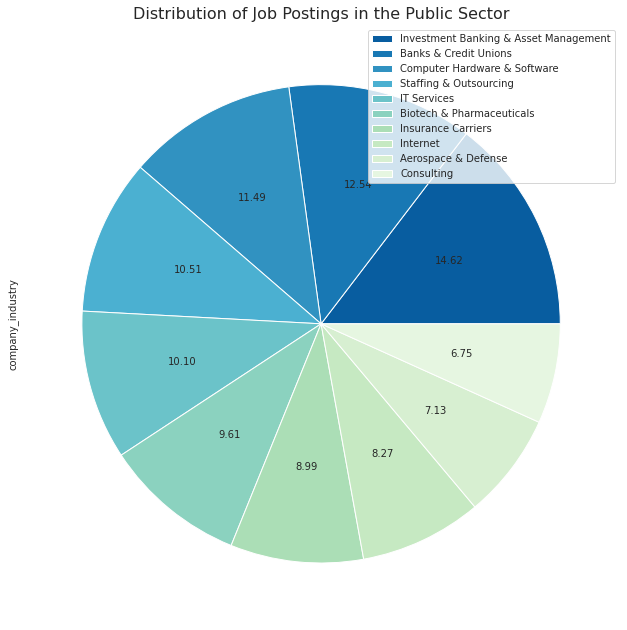

In [125]:
plot_top10_piechart(public_sector, "company_industry", "Distribution of Job Postings in the Public Sector")

#### Key Findings:

- This is more than expected, investors and banks are having the most job postings in the Private sector, followed by Hardware & Software, Staffing & Outsorcing and IT services

Let's look in a bit more depth into that sector.

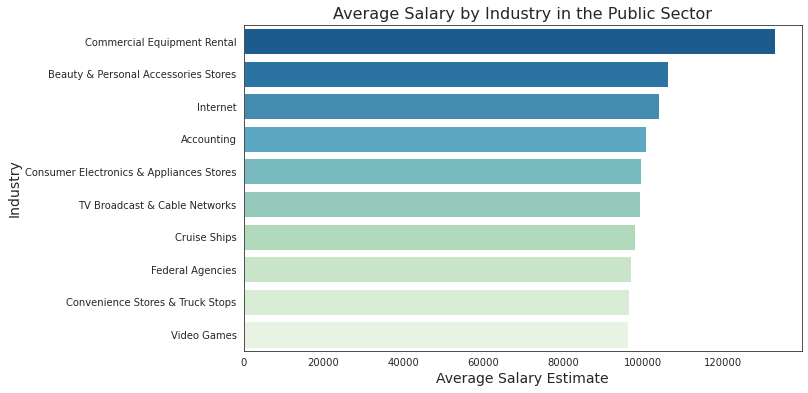

In [126]:
plot_top10_barplot(
    public_sector, 
    grouped_by = "company_industry",
    feature = "avg_salary_usd",
    col_1 = "avg_salary_usd", 
    col_2 = "company_industry", 
    title = "Average Salary by Industry in the Public Sector",
    x_label = "Average Salary Estimate", 
    y_label = "Industry", 
    fig_size = (10, 6)
)

In [127]:
public_sector.groupby("company_industry")["avg_salary_usd"].mean().nlargest(10).sort_values(ascending = False)

company_industry
Commercial Equipment Rental                 133000.000000
Beauty & Personal Accessories Stores        106125.000000
Internet                                    103874.324324
Accounting                                  100769.230769
Consumer Electronics & Appliances Stores     99500.000000
TV Broadcast & Cable Networks                99306.451613
Cruise Ships                                 98000.000000
Federal Agencies                             97000.000000
Convenience Stores & Truck Stops             96500.000000
Video Games                                  96196.969697
Name: avg_salary_usd, dtype: float64

#### Key Findings:

- Very interesting here is the dominance of Commercial Equipment Rental with approximately 30.000 USD higher average salary than the rest. We can inspect a bit more and see if there is some obvious reason behing it. Let's check the amount of posts in this industry in the Public sector

In [128]:
public_sector[public_sector.company_industry == "Commercial Equipment Rental"].avg_salary_usd

20868    133000
Name: avg_salary_usd, dtype: int64

- We have our reason here, there's only one post with average salary of 133000. Our data is clearly biased, and we cannot consider this industry's 1st place relevant at all

<br>

After looking at the industry's average salary distribution, it might make sense to explore the Company's Revenue correlation to some other features

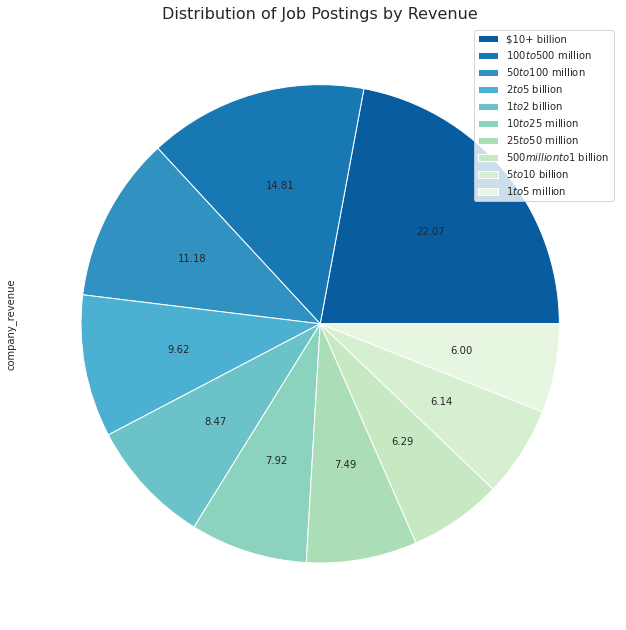

In [129]:
plot_top10_piechart(data_us[data_us.company_revenue != "Unknown / Non-Applicable"], "company_revenue", "Distribution of Job Postings by Revenue")

#### Key Findings:

- The distribution is pretty much as expected, the companies with largest revenue have the most job postings, no surprises here

<br>

#### Hypothesis Testing on Revenue vs. Salary:

$H_0:$ Company's revenue is not correlated with the salary

$H_1:$ Company's revenue is correlated with the salary

In [130]:
revenue_factorized = pd.factorize(data_us.company_revenue)[0]

In [131]:
corr_test(revenue_factorized, data_us.avg_salary_usd)

Pearson correlation coefficient: -0.0319
P-value: 0.0


$H_1$ rejected - no correlation of high significance

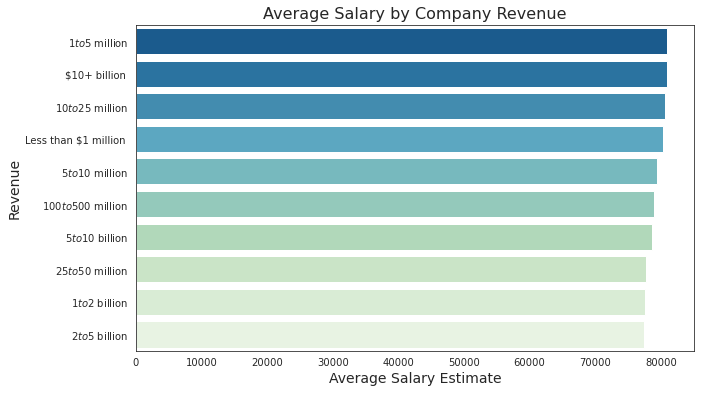

In [132]:
plot_top10_barplot(
    data_us[data_us.company_revenue != "Unknown / Non-Applicable"], 
    grouped_by = "company_revenue",
    feature = "avg_salary_usd",
    col_1 = "avg_salary_usd", 
    col_2 = "company_revenue", 
    title = "Average Salary by Company Revenue",
    x_label = "Average Salary Estimate", 
    y_label = "Revenue", 
    fig_size = (10, 6)
)

In [133]:
data_us[data_us.company_revenue != "Unknown / Non-Applicable"].groupby("company_revenue")["avg_salary_usd"].mean().nlargest(10).sort_values(ascending = False)

company_revenue
$1 to $5 million         80959.296482
$10+ billion             80910.953291
$10 to $25 million       80607.006855
Less than $1 million     80379.090909
$5 to $10 million        79365.661861
$100 to $500 million     79000.203583
$5 to $10 billion        78560.353288
$25 to $50 million       77728.663446
$1 to $2 billion         77619.572954
$2 to $5 billion         77393.483709
Name: avg_salary_usd, dtype: float64

- The results are interesting, apparently the companies with the smallest revenue, offer the highest average salaries, even though they are just slightly higher. Well, of course! In order to stay competitive and attract good talented employees, the small businesses MUST offer better salaries.

#### Let's take this a bit further and see the relationship between the revenue and the age of the company.

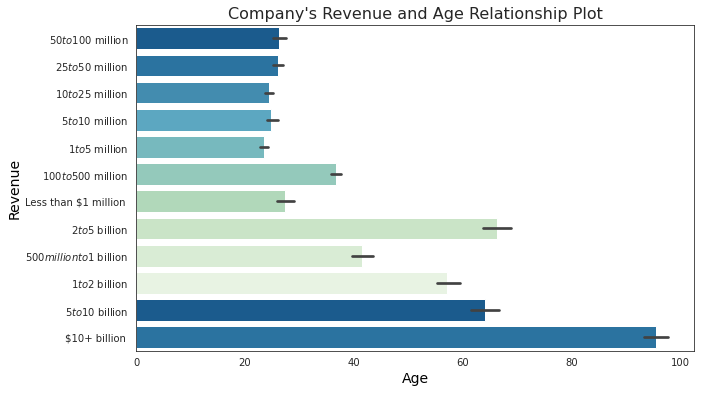

In [134]:
plt.figure(figsize = (10, 6))
sns.barplot(x = "company_age", y = "company_revenue", data = data_us[data_us.company_revenue != "Unknown / Non-Applicable"].sort_values("company_size",ascending = False), palette = colors)

plt.title("Company's Revenue and Age Relationship Plot", size = 16)
plt.xlabel("Age", fontsize = 14, color='black')
plt.ylabel("Revenue", fontsize = 14, color='black')

plt.show()

Apparently the older the company is, the higher the revenue. Makes sense, right?

<br>

#### As we are progressing in our analysis, let's now look at the job positions in our dataset.

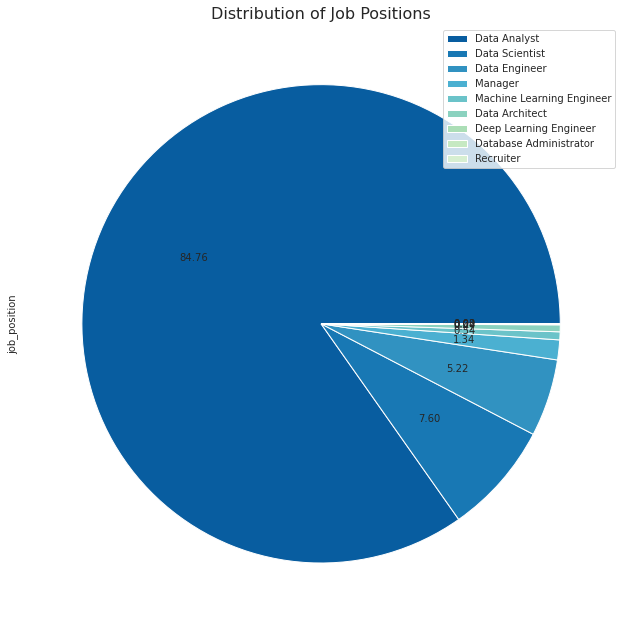

In [135]:
plot_top10_piechart(data_us[data_us.job_position != "na"], "job_position", "Distribution of Job Positions")

#### Key Findings:

- There is obvious domination of the title Data Analyst. Of course, the demand for analysts is much bigger than the rest, as it isn't so skill demanding as Data Scientist of Data Engineer for example.

- Also, Data Analysts might be working with small data in many cases (and this suggests that all sorts of companies will need them), and the rest of the professions in our chart, tend to work more with Big Data.

- It's also a bit surprising that there is such a little demand for Machine Learning Engineers.

<br>

#### It will be interesting to see who gets paid the most... we can create a pivot table for this purpose and include the seniority for more detail.

In [136]:
pd.pivot_table(
    data_us[data_us.seniority_level != "na"],
    index = ["job_position", "seniority_level"], 
    values = ["avg_salary_usd", "max_salary_usd", "min_salary_usd"], 
    margins = True,
    aggfunc = np.max
)

avg_salary_usd  max_salary_usd  \
job_position              seniority_level                                   
Data Analyst              Assistant                130000          200000   
                          Chief                    124000          160000   
                          Director                 155000          186000   
                          Junior                   172500          226000   
                          Manager                  145000          188000   
                          Senior                   172500          226000   
                          Supervisor               121000          172000   
                          Trainee                  163500          206000   
Data Architect            Chief                     99500          129000   
                          Director                  53000           69000   
                          Manager                   80000          110000   
                          Senior                   129000          181000   
Data Engineer             Chief                     99500          129000   
                          Director                 217500          281000   
                          Junior                   131000          181000   
                          Manager                  217500          281000   
                          Senior                   217500          281000   
Data Scientist            Assistant                161500          211000   
                          Chief                    177500          217000   
                          Director                 172000          210000   
                          Junior                   148500          184000   
                          Manager                  177500          217000   
                          Senior                   225000          254000   
                          Supervisor               153500          188000   
                          Trainee                   53000           72000   
Deep Learning Engineer    Senior                    86000          111000   
Machine Learning Engineer Director                  62500           86000   
                          Manager                  140500          179000   
                          Senior                   161000          192000   
Manager                   Director                  93000          106000   
                          Manager                  225000          250000   
                          Senior                   150000          186000   
na                        Assistant                 38500           50000   
                          Director                 160500          184000   
                          Junior                   155500          198000   
                          Senior                   225000          250000   
                          Supervisor                61000           74000   
All                                                225000          281000   

                                           min_salary_usd  
job_position              seniority_level                  
Data Analyst              Assistant               89000.0  
                          Chief                   88000.0  
                          Director               124000.0  
                          Junior                 150000.0  
                          Manager                102000.0  
                          Senior                 133000.0  
                          Supervisor              70000.0  
                          Trainee                121000.0  
Data Architect            Chief                   70000.0  
                          Director                37000.0  
                          Manager                 51000.0  
                          Senior                  77000.0  
Data Engineer             Chief                   70000.0  
                          Director               154000.0  
  

#### Key Findings:

Note: "na" means that the job seniority wasn't mentioned in the description

- It's interesting to see that the highest salary in our dataset ($281,000) belongs to data engineers. As they can be considered the backbone of all Data jobs, it makes sense that they will be rewarded accordingly to their responsibility.

- 2nd place is for data scientists with \\$254.000, and third to the managing staff with $250,000.

- Surprisingly the max salary of the ML engineers is lower than the one of data scientists, engineers and even analysts, but most probably this has changed recently.

- It is obvious that the lowest salary will go for Trainee & Assistant positions, but what's surprising is that a data architects could earn low salaries as well. There is big gap between the minimum and maximum salary for this position, and this is mostly based on the experience of the employee and the company's overall development.

- What is very curious is that DL engineers usually earn somehow higher salaries, especially for Senior level. One possible reason could be that we do not have much DL positions in this dataset and the ones that are in are provided by companies with lesser capabilities.

<br>

#### Let's also have a look at the jobs postings for the different positions in the top 3 states with the most job postings

In [137]:
pivoted_data_us = pd.pivot_table(data_us, index = ['job_state','job_position'], values = 'avg_salary_usd', aggfunc = 'count').sort_values('job_state', ascending = False)

In [138]:
pivoted_data_us.loc[["TX", "CA", "IL"]]

avg_salary_usd
job_state job_position                             
TX        Database Administrator                  2
          Data Analyst                         4109
          Data Architect                         43
          Data Engineer                         335
          Data Scientist                        348
          Machine Learning Engineer              32
          Manager                               104
          na                                    905
CA        Data Architect                         10
          Machine Learning Engineer              48
          Data Analyst                         3432
          Data Scientist                        516
          Data Engineer                         277
          Manager                                64
          Database Administrator                  1
          Deep Learning Engineer                  3
          na                                    443
IL        na                                    208
          Manager                                34
          Machine Learning Engineer               7
          Database Administrator                  2
          Data Scientist                        134
          Data Engineer                          97
          Data Architect                         13
          Data Analyst                         1526

#### Key Findings:

- We can say that Data Analysts are much more demanded in those 3 states, but the ratio Data Analyst : Data Scientist shows that There is higher demand for data scientists related to data analysts in California. The ratios are approximately as follows: TX (13:1), CA (7:1), IL (11:1)

<br>

#### Our analysis of this dataset is reaching it's end, and we can now have a look at some of the most interesting features of it - the skills required for the different job positions and how do they relate to the average salary.

In [139]:
skills_pivot_us = data_us[["job_position", "python_job", "rstudio_job", "sql_job", "excel_job", "tableau_job", "ml_job", "dl_job","spark_job", "hadoop_job", "tensorflow_job", "avg_salary_usd"]]

In [140]:
skills = ["python_job", "rstudio_job", "sql_job", "excel_job", "tableau_job", "ml_job", "dl_job","spark_job", "hadoop_job", "tensorflow_job"]

In [141]:
for skill in skills:
    table = pd.pivot_table(
        skills_pivot_us[skills_pivot_us.job_position != "na"], 
        index = "job_position", 
        columns = skill, 
        values = "avg_salary_usd", 
        aggfunc = ["mean", "count"]).rename(columns = {"mean": "Average Salary USD"}
    )
    print(table)

                          Average Salary USD                   count        
python_job                                 0              1        0       1
job_position                                                                
Data Analyst                    73582.939633   76231.893837  15240.0  2223.0
Data Architect                  78961.038961   91342.105263     77.0    19.0
Data Engineer                   99430.795848  107687.420584    289.0   787.0
Data Scientist                 105290.816327  120067.613636    686.0   880.0
Database Administrator         145500.000000   81375.000000      1.0     4.0
Deep Learning Engineer         105916.666667   38500.000000      6.0     2.0
Machine Learning Engineer      128229.166667  116229.885057     24.0    87.0
Manager                         77247.933884  105342.857143    242.0    35.0
Recruiter                      101000.000000            NaN      1.0     NaN
                          Average Salary USD                   count       


#### Key Findings:

We will observe only the top 5 most interesting for our research positions: data scientist, data analyst, data engineer, ML engineer & DL engineer.

Note: The amount of postings for Deep Learning engineers are only 8, therefore the results we receive can be considered biased and not taken as relative.

1. Python

    - We can see that that job positions are generally paid more if python is mentioned in the description. This is not the case for ML & DL, but of course, python is not mentioned there probably because it's well known that it's the main requirement
    
    - Also, Python skill is required in about 56%, 13%, 73%, 78% and 25% of the job postings for Data Scientist, Data Analyst, Data Engineer, ML Engineer and DL Engineer job positions respectively
    
    - It is interesting that the average salary for a database administrator is much lower where python is mentioned. Why is that? Indeed, one should absolutely have an automation tool to manage databases as well as whatever language is needed for the database management system itself (some skills of SQL usually). However, Python in particular, is not a required language to become a DBA. There are a lot of DBA types who use PowerShell, not Python. Others use different languages entirely
    
2. RStudio

    - Generally, the salary tends to be a bit higher, where RStudio is mentioned, but the ratio of required vs. unrequired is showing that Rstudio is not one of the most demanded skills in all data jobs in our list
    
3. SQL

    - Curiously, there is not much of a positive correlation of Excel and higher salaries, Except for the Data Science branch. The rest are either negative or nearly insignificant
    
    - Also, this skill is required in about 38%, 31%, 73%, 41% and 0% of the job postings for Data Scientist, Data Analyst, Data Engineer, ML Engineer and DL Engineer job positions respectively
    
4. Excell

    - In most of the positions the presence of Excel in the job description signifies lower salary, except for Database Administrator and ML Engineers.
    
    - This skill is required in about 47%, 61%, 73%, 34% and 50% of the job postings for Data Scientist, Data Analyst, Data Engineer, ML Engineer and DL Engineer job positions respectively
    
5. Tableau

    - We can say that in most of the cases, except for DBA, ML & DL, tableau lifts up the expected average or at least it is more or less the same as without it required
    
    - Tableau is required in about 12%, 15%, 18%, 4% and 0% of the job postings for Data Scientist, Data Analyst, Data Engineer, ML Engineer and DL Engineer job positions respectively
    
6. Machine Learning

    - We can confidently conclude that ML improves the chances for higher salary in all the different positions that it is mentioned, and this is not really unexpected
    
    - ML skills are required in about 49%, 3%, 24%, 96% and 12.5% of the job postings for Data Scientist, Data Analyst, Data Engineer, ML Engineer and DL Engineer job positions respectively

7. Deep Learning

    - We can see the same situation as with ML. Deep Learning skills improve the chance for higher salary significantly

    - DL skills are required in about 12%, 0%, 1%, 40% and 12.5% of the job postings for Data Scientist, Data Analyst, Data Engineer, ML Engineer and DL Engineer job positions respectively
    
8. Spark

    - Except for DBA and ML engineers we can say that Spark improves the chances for higher salary significantly
    
    - Spark is required in about 19%, 2%, 54%, 41% and 0% of the job postings for Data Scientist, Data Analyst, Data Engineer, ML Engineer and DL Engineer job positions respectively
    
9. Hadoop

    - Same as for Spark, Hadoop improves the salary estimate in all positions except DBA & ML engineer.
    
    - Hadoop skills are required in about 12%, 2%, 38%, 29% and 0% of the job postings for Data Scientist, Data Analyst, Data Engineer, ML Engineer and DL Engineer job positions respectively
    
10. Tensorflow

    - Except for data engineers, DBA & DL engineers (for which we have very little data), we can confidently say that TF improves the chances for higher salary.
    
    - TF is required in about 11%, 0%, 2%, 42% and 0% of the job postings for Data Scientist, Data Analyst, Data Engineer, ML Engineer and DL Engineer job positions respectively
    

#### Now we can conclude our analysis with the inspection of the correlations of all numerical and discrete variables, and the correlation of all nominal variables

In [142]:
numerical_and_binary_us = data_us.select_dtypes(include = "number")

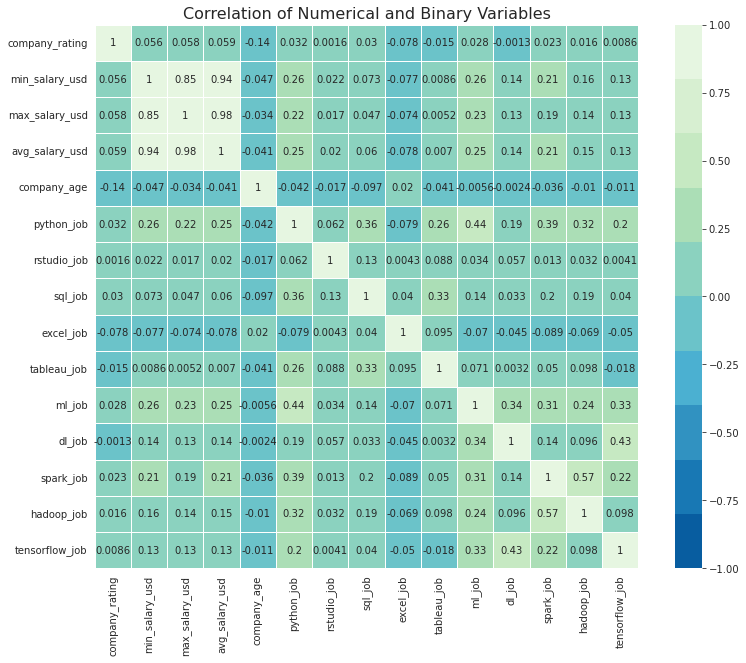

In [143]:
plot_heatmap(numerical_and_binary_us, "Correlation of Numerical and Binary Variables", (13, 10))

#### Key Findings:

- Again, there are no correlations of high significance

- We can see that the salary is slightly correlated with Python & Machine Learning skills, but definitely not too much

- We can also observe that if a candidate is expected to work with Python, there is a decent chance that they will be demanded to have Machine Learning in their skillset as well

- There's also a mild correlation of Python and SQL    
    
- The strongest correlation here is between Spark and Hadoop, which supports the fact that using them together helps users leverage the power of Machine Learning

- Of course we can see that there is a somewhat significant correlation between Tensorflow and Deep Learning, which is obviously expected

In [144]:
nominal_features_us = data_us.select_dtypes(exclude = "number")

In [145]:
nominal_features_us = nominal_features_us.apply(lambda x: pd.factorize(x)[0])

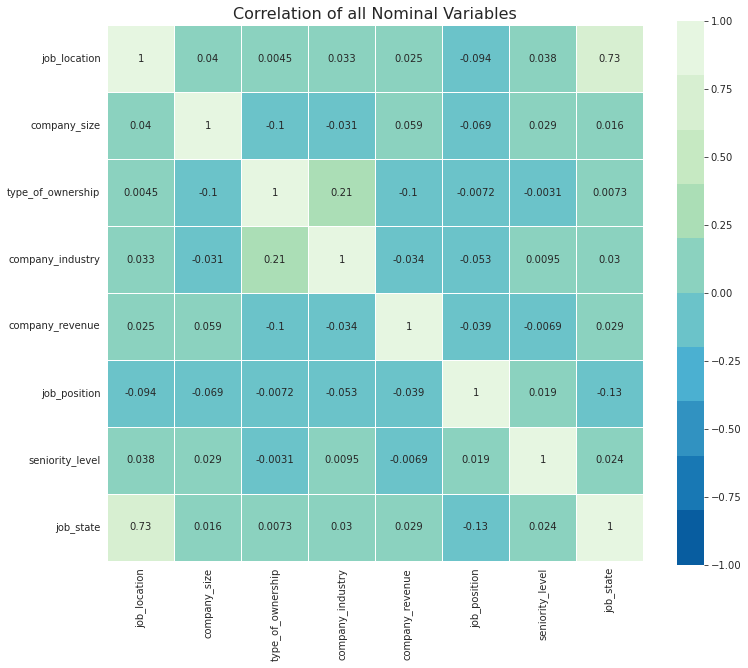

In [146]:
plot_heatmap(nominal_features_us, "Correlation of all Nominal Variables", (12, 10))

#### Key findings:

- Besides the obvious correlations of the job title and the job positions, and the job location and the job state, there are no other significant correlations here that are worthy of further exploration

<br>

#### Now we can try to describe the most valuable conclusions of our exploration...

### Summary:

#### Salary overview:

1. **Minimum salary** values range between $12,000 and \\$200,000 yearly. The most frequently occuring minimum wage is \\$45,000.

    - The average of the most expected minimum salaries for data professionals in this dataset range between $45,000 and \\$59,000.

<br>

3. **Maximum salary** values range between $37,000 and \\$281,000.  \\$84,000 is the most frequently occurring wage in our data.

    - We can expect that the average of the maximum salary for a data professional would range in between $84,000 and \\$100,000

<br>

3. **Average salary** values range between $33.000 and \\$225.000 yearly. The most frequently occuring average salary is \\$61,000. 

    - It is somehow safe to say that the most expected average salaries for data professionals range in between the mode and the mean of the distribution \\$61,000 - \\$80,000
    
<br>

#### Rating Overview:

1. Most common ratings are around the 3.5 - 4 (~3.7) values.

2. There are many outliers and after performing normality test, we concluded that the mean value can't be trusted and the distribution is biased towards those outliers.

<br>

#### Company Age Overview:

1. There is a significant amount of companies that are older than 100 years in our dataset. Therefore we have a decent amount of outliers.

1. Our investigation shows that the mean value of Age can't be trusted as it will be clearly biased towards the outliers.

<br>

#### Salary, Rating & Age Correlation:

1. There is no significant correlation between the min, max and average estimate salary and the company's age and rating.

<br>

#### Top States by Job Postings overview:

1. In our dataset Texas holds the first place, with nearly 25% of all the job postings.

2. Texan market is looking increasingly lucrative for both young start-ups and established tech companies alike. One of the most significant factors in this rapid growth is the favourable tax conditions in the state.

3. California holds the second place, and this of course is a bit surprising, given the fact that they are the biggest tech hub in the US.

4. Illinois and Arizona hold the 3rd and 4th position respectively, due to the fact that they are evolving technologically with a very high speed in the last years.

5. New York is 5th, even though a big number of the Fortune 500 companies reside there. This shows us that the data jobs market in the United States is starting to distribute more evenly.

<br>

#### Salary per State overview:

1. **Minimum Salary per State** - California offers the highest minimum wages, followed by the states of New York, Oregon, Vermont and Denver.

    - The lowest minimum wages are in Utah, followed by Indiana, New Mexico, Hawaii, and Kentucky. Pretty much logical outcome, as those states are not very developed technologically
    
2. **Maximum Salary per State** - California is first again, followed by the states of Vermont, Oregon, New York and Pennsylvania.

    - The lowest maximum wages are in Utah, followed by Hawaii, Kentucky, Indiana, and Nevada

3. **Average Salary per State** - California offers the highest average wages, followed by the states of Vermont, Oregon, New York and Denver.

    - The lowest average wages are in Utah, followed by Kentucky, Hawaii, Indiana, and Nevada. Confirming the most unfavorable states to work as a data professional.
    
4. Summary:

    - The min, max and average salary in California is nearly 3 times higher than the ones in the lowest paid state - Utah
    
    - The most favorable states to work as a data professional are California, Vermont, Oregon, New York, Denver and Pennsylvania
    
    - The most unfavorable states to work as a data professional are Utah, Kentucky, Hawaii, Nevada, Indiana and New Mexico
    
<br>

#### Job Postings by Company Size Overview:

1. Besides the largest companies offering the highest number of job postings, there is plenty of positions offering from medium and small-sized businesses.

2. The demand of data professionals is high, no matter the size of the company!

<br>

#### Hypothesis Testing on Size vs. Salary:

$H_0:$ Company's size is not correlated with the salary

$H_1:$ Company's size is correlated with the salary

1. Size vs. Minimum Salary

    - $H_1$ rejected - this is the biggest correlation of the 3 types of salary, but still, it is not a statistically significant one
    
    - Small and medium-sized businesses offer higher minimum wages, due to matters of limited budget optimization
    
2. Size vs. Maximum Salary

    - $H_1$ rejected - there's no significant correlation here
    
    - Smallest companies offer the highest maximum wages, as a way to attract competitive professionals
    
3. Size vs. Average Salary

    - $H_1$ rejected - there's no significant correlation here as well
    
    - Having the previous results in mind, we can conclude that the highest average salaries are also offered by the small and the medium-sized companies
    
<br>

#### Hypothesis Testing on Type of Ownership vs. Salary:

$H_0:$ Company's type of ownership is not correlated with the salary

$H_1:$ Company's type of ownership is correlated with the salary

- $H_1$ rejected - there's no significant correlation between those two features

1. The Private sector dominates the data job market with 54% of job postings.

    - The top 5 industries in the Private Sector per job postings are: 
    
        1. IT Services 
        
        2. Staffing & Outsourcing 
        
        3. Consulting 
        
        4. Computer Hardware & Software 
        
        5. Enterprise Software & Network Solutions 
        
    Those 5 share over 70% of all postings.        
    
    - The top 5 industries that offer the highest average salaries are:
    
        1. Transportation, Equipment & Manufacturing
        
        2. Fast-Food & Quick-Service Restaurants
        
        3. Music Production & Distribution
        
        4. Express Delivery Services
        
        5. Religious Organizations
        
        There is a difference of over $20,000 between the 1st and the 5th
        
2. The Public sector has the second place with 30% of all job postings.

    - Top 5 industries in the Public Sector per job postings are:
    
        1. Investment Banking & Asset Management
        
        2. Banks & Credit Unions
        
        3. Computer Hardware & Software
        
        4. Staffing & Outsourcing
        
        5. IT Services
        
    Those 5 share almost 60% of all postings, and we can see that the last 3 match with the Private sector.
    
    - Top 5 industries that offer the highest average salaries are:
        
        1. Beauty & Personal Accessories Stores
        
        2. Internet
        
        3. Accounting
        
        4. Consumer Electronics & Appliances Stores
        
        5. TV Broadcast & Cable Networks
        
        The gap between the 1st in the 5th here is not so big, only $7,000.
        
<br>

#### Hypothesis Testing on Revenue vs. Salary:

$H_0:$ Company's revenue is not correlated with the salary

$H_1:$ Company's revenue is correlated with the salary

- $H_1$ rejected - no correlation of high significance between revenue and average salary
        
1. As expected, the companies with the largest revenues offer the most data positions.

2. The surprise here comes from the salaries offered by the companies with the smallest revenue are nearly identical to the ones offered by the ones with the biggest revenue - showing us that the competition for data professionals is really fierce.

<br>

#### Company Revenue vs. Age Correlation Overview:

1. This investigation showed us that the older the company is, the higher revenue we can expect it to have.

<br>

#### Distribution of Job Positions Overview:

1. Almost 85% of the job postings in our data are for data analysts. This is because the qualification requirements and cost-per-hire are lower for analysts.

2. Data scientists and engineers share almost 13% of the rest of the postings, leaving only the remaining 2% for ML & DL engineers, database administrators, data architects, managers and recruiters.

<br>

#### Salary by Job Position Overview:

1. Highest maximum salaries in this dataset ($281,000) belong to data engineers.

2. Second place goes for data scientists with $254,000, third for management with $250,000.

3. Apparently, ML & DL engineers are not as valued as the top 3, but this is a subject of doubt and further investigation, because we don't have too much observations of those 2 positions.

4. As expected lowest salaries go to trainee & assistant positions, but we can see that data architects can be paid very little as well.

<br>

#### Job Positions in the Top 3 States per Postings Overview:

1. Texas - data analyst to data scientist ratio of postings is 13:1

2. California - here the ration is 7:1, showing that California shows almost the double interest in data scientists

3. Illinois - here the rations is similar to Texas 11:1

As a conclusion we can say that there are more advanced tech and other businesses in California, that look for data scientists.

<br>

#### Overview of the Salary - Skill Relation in Each Job Position:

1. This part of our analysis shows that the highest expected salaries are where DL, ML, SQL, Spark, Hadoop and Tensorflow are mentioned in the requirements, making those skills a must for a good wage.

2. The most demanded skills for our top 5 job positions are as follows:

    - Data Scientist - Python, ML and Excel
    
    - Data Analyst - Excel, SQL and Python
    
    - Data Engineer - Python, SQL and Excel (with an equal percentage)
    
    - ML Engineer - ML, Python, Tensorflow
    
    - DL Engineer - our observations here are too few in order to conclude anything
    
We can see that without being skillful in Python, there is hardly any chance to succeed in that area, except for being a data analyst. SQL and Excel add a lot of possibilities as well.

<br>

#### Overview of Correlation Between the Numerical and Binary Variables (Rating vs. Salary vs. Age vs. Skills):

1. The strongest correlation is between Spark & Hadoop, confirming that those two are usually required together.

2. Python and SQL are also mildly correlated, but not too much.

3. There is a some correlation between Python & ML.

4. Also, we have some correlation with the salary vs Python & ML, but not too significant one.


#### Overview of Correlation Between All Nominal Variables (Location vs. Size vs. Owneship vs. Industry vs. Revenue vs. Position vs. Seniority):

1. There are no significant correlations in between those features.

<br>

### Summary

With this we can conclude our analysis and point out the top 10 most important findings:

1. Salaries in the data job market can range between $12,000 and \\$281,000. This is a really big gap, showing the diversity of the positions.

2. There is no significant correlation between the company's rating and the salary.

3. Texas offers a lot of data related jobs, but California remains the one that pays the best.

4. If you want a good reward for your work - do not apply for a job in Utah ;) 

5. All sizes of companies offer a lot of positions and the salaries could be even better in a small business.

6. If you want a high wage in the Public or Private sector, look for jobs in Transportation, Fast-Food Services, Music Production, Beauty & Personal Accessories, Internet & Accounting.

7. If you expect to earn more, check out those companies with low revenue first.

8. In case you wonder what could be the company with lower revenue, check out the youngest ones, but of course not too young to be considered unreliable.

9. Your chance to find a job as data scientist is higher in California.

10. Learn Python as a must, and add Excel & SQL if you want to have more chances in finding a job. Learn Tensorflow if you want to focus in ML or DL.

<br>

### It is time to continue with out second data set and explore the UK data job market

In [147]:
data_uk = pd.read_csv("data/data_reed_cleaned.csv")

In [148]:
data_uk.head()

,Unnamed: 0,company_name,job_location,min_salary_gbp,max_salary_gbp,avg_salary_gbp,python_job,rstudio_job,sql_job,excel_job,tableau_job,ml_job,dl_job,spark_job,hadoop_job,tensorflow_job,job_position,seniority_level
0,0,Charles Simon Associates Ltd,Camden,70000,80000,75000,1,0,1,0,1,0,0,1,0,0,Manager,Manager
1,1,Crone Corkill,London,20000,26000,23000,0,0,0,1,0,0,0,0,0,0,Recruiter,na
2,2,Harnham,London,75000,80000,77500,1,0,1,0,0,1,0,1,0,0,na,Senior
3,3,QUINTON DAVIES LIMITED,Bristol,35000,65000,50000,1,0,0,0,0,0,0,0,0,0,na,na
4,4,Data Idols,London,100000,120000,110000,0,0,0,0,0,1,0,0,0,0,Manager,Manager


In [149]:
data_uk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       595 non-null    int64 
 1   company_name     595 non-null    object
 2   job_location     595 non-null    object
 3   min_salary_gbp   595 non-null    int64 
 4   max_salary_gbp   595 non-null    int64 
 5   avg_salary_gbp   595 non-null    int64 
 6   python_job       595 non-null    int64 
 7   rstudio_job      595 non-null    int64 
 8   sql_job          595 non-null    int64 
 9   excel_job        595 non-null    int64 
 10  tableau_job      595 non-null    int64 
 11  ml_job           595 non-null    int64 
 12  dl_job           595 non-null    int64 
 13  spark_job        595 non-null    int64 
 14  hadoop_job       595 non-null    int64 
 15  tensorflow_job   595 non-null    int64 
 16  job_position     595 non-null    object
 17  seniority_level  595 non-null    ob

In [150]:
data_uk.drop("Unnamed: 0", axis = 1, inplace = True)

- We have much fewer features and observations here, but still, the data will allow us to compare the most important ones of both markets

<br>

#### Let's continue by exploring our numerical variables individually

- Starting with one of the key features - avg_salary_gbp

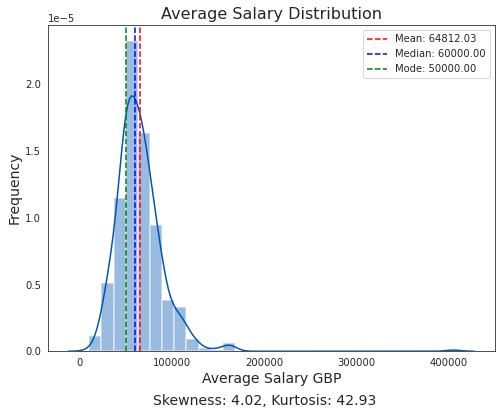

In [151]:
plot_distribution(data_uk.avg_salary_gbp, "Average Salary Distribution", "Average Salary GBP", "Frequency", bins = 30)

#### Key Findings:

- Compared to the US market we can see much less outliers here

- But then the skewness and kurtosis levels are huge... showing that our distribution is cannot be considered normal and it must be normalized for modeling

- Let's confirm that with a normality test:

In [152]:
test_normality(data_uk.avg_salary_gbp)

Statistics = 0.794, p-value = 0.000
Sample does not look Gaussian (reject H0)


- We can take the median £60,000 as the average expected salary of all the averages

- The most frequently occurring average salary is £50,000

<br>

#### Let's explore the minimum salary

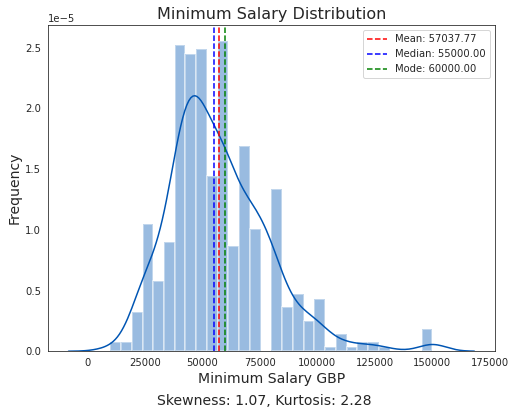

In [153]:
plot_distribution(data_uk.min_salary_gbp, "Minimum Salary Distribution", "Minimum Salary GBP", "Frequency", bins = 30)

- This distribution doesn't look normal, but we can check this more accurately with a test

In [154]:
test_normality(data_uk.min_salary_gbp)

Statistics = 0.940, p-value = 0.000
Sample does not look Gaussian (reject H0)


- There are a bit more outliers here, therefore this feature will definitely be normalized for modeling

- The median £55,000 might be the most expected average salary

- The most frequent one is £60,000, and it's surprisingly higher than the mode in the average salary feature

<br>

#### Now let's go through the maximum salary...

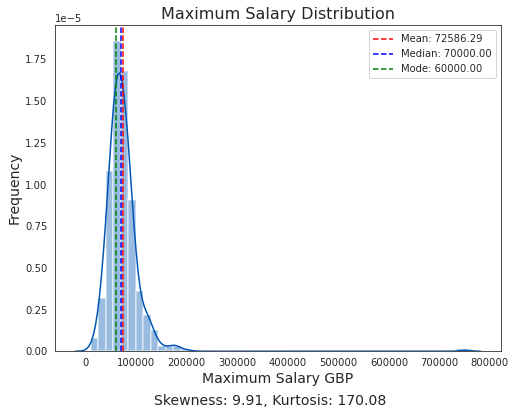

In [155]:
plot_distribution(data_uk.max_salary_gbp, "Maximum Salary Distribution", "Maximum Salary GBP", "Frequency", bins = 50)

- There are also some more outliers here, and this distribution is really highly skewed. There is no need of normality test to confirm that.

- The median of the maximum salary is at £70,000 although given the shape of the distribution we might want to consider the mean £72,586

- The most frequent maximum salary is also £60,000, same as in the minimum one

<br>

#### Now we can look at the top 10 locations by job postings

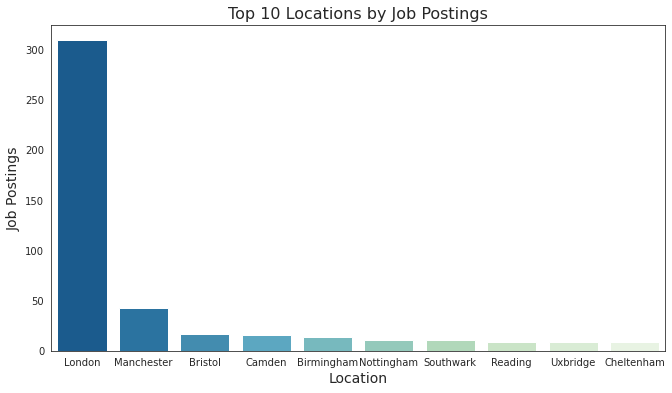

In [156]:
plot_top10_countplot(data_uk.job_location, (11, 6), "Top 10 Locations by Job Postings", "Location", "Job Postings")

#### Key Findings:

- In comparison to the US market, here the number 1 (London) is without any competition with more than 50% of all job postings

- Second place goes for Manchester - announced as the fastest growing tech hub in Europe, and on the third position is Bristol, known as one of the fastest growing tech hubs in the UK

- There are no surprises here

<br>

#### Let's explore the top 10 location by higest average salary

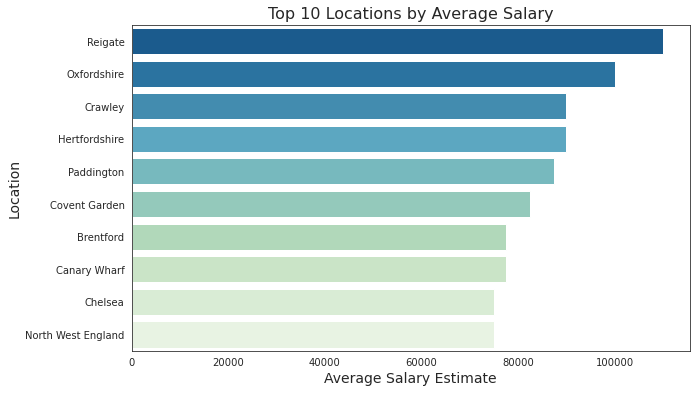

In [157]:
plot_top10_barplot(
    data_uk, 
    grouped_by = "job_location",
    feature = "avg_salary_gbp",
    col_1 = "avg_salary_gbp", 
    col_2 = "job_location", 
    title = "Top 10 Locations by Average Salary",
    x_label = "Average Salary Estimate", 
    y_label = "Location", 
    fig_size = (10, 6)
)

In [158]:
data_uk.groupby("job_location")["avg_salary_gbp"].mean().nlargest(10).sort_values(ascending = False)

job_location
Reigate               110000.0
Oxfordshire           100000.0
Crawley                90000.0
Hertfordshire          90000.0
Paddington             87500.0
Covent Garden          82500.0
Brentford              77500.0
Canary Wharf           77500.0
Chelsea                75000.0
North West England     75000.0
Name: avg_salary_gbp, dtype: float64

#### Key Findings:

- Very interesting, Reigate is the location with highest average salary. Of course Reigate is located 31km near London area, so that makes sense.

- Oxfordshire is also in very near to London, same as Crawley, Hertfordshire and Paddington is in London itself

- This confirms that the highest paid jobs are in the London district

<br>

#### Now let's have a look at the maximum and minimum salaries by location

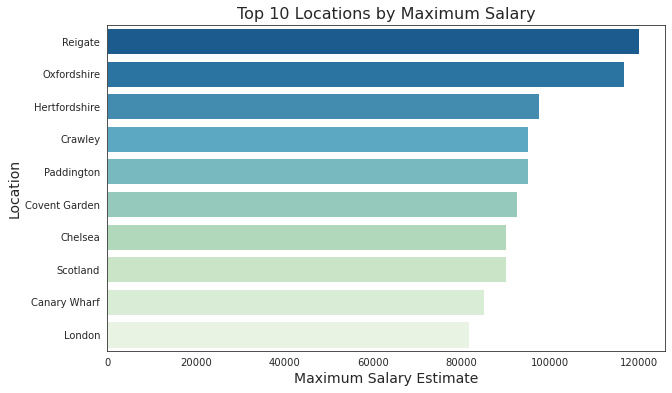

In [159]:
plot_top10_barplot(
    data_uk, 
    grouped_by = "job_location",
    feature = "max_salary_gbp",
    col_1 = "max_salary_gbp", 
    col_2 = "job_location", 
    title = "Top 10 Locations by Maximum Salary",
    x_label = "Maximum Salary Estimate", 
    y_label = "Location", 
    fig_size = (10, 6)
)

In [160]:
data_uk.groupby("job_location")["max_salary_gbp"].mean().nlargest(10).sort_values(ascending = False)

job_location
Reigate          120000.000000
Oxfordshire      116666.666667
Hertfordshire     97500.000000
Crawley           95000.000000
Paddington        95000.000000
Covent Garden     92500.000000
Chelsea           90000.000000
Scotland          90000.000000
Canary Wharf      85000.000000
London            81606.957929
Name: max_salary_gbp, dtype: float64

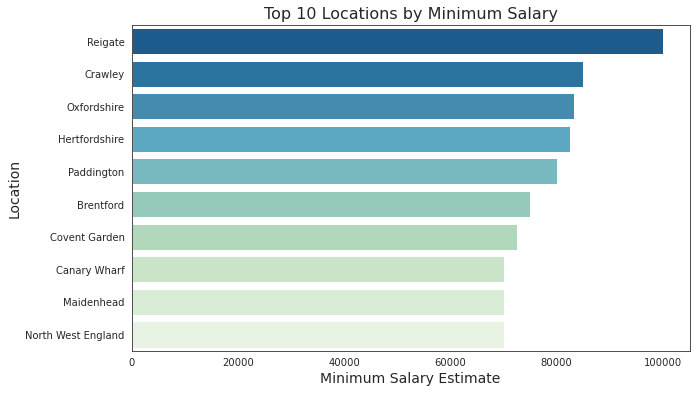

In [161]:
plot_top10_barplot(
    data_uk, 
    grouped_by = "job_location",
    feature = "min_salary_gbp",
    col_1 = "min_salary_gbp", 
    col_2 = "job_location", 
    title = "Top 10 Locations by Minimum Salary",
    x_label = "Minimum Salary Estimate", 
    y_label = "Location", 
    fig_size = (10, 6)
)

In [162]:
data_uk.groupby("job_location")["min_salary_gbp"].mean().nlargest(10).sort_values(ascending = False)

job_location
Reigate               100000.000000
Crawley                85000.000000
Oxfordshire            83333.333333
Hertfordshire          82500.000000
Paddington             80000.000000
Brentford              75000.000000
Covent Garden          72500.000000
Canary Wharf           70000.000000
Maidenhead             70000.000000
North West England     70000.000000
Name: min_salary_gbp, dtype: float64

#### Key findings:

- The top 5 locations are nearly identical, but it might be said that there is a good amount of chance that the locations nearby London pay higher than the ones in the capitol itself.

<br>

#### Performing Hypothesis Testing on Location vs. Salary

We want to prove whether if the company's location is correlated with the salary:

* $H_0:$ Company's location is not correlated with the salary.
* $H_1:$ Company's location is correlated with the salary.

In [163]:
location_factorized = pd.factorize(data_uk.job_location)[0]

In [164]:
corr_test(location_factorized, data_uk.avg_salary_gbp)

Pearson correlation coefficient: -0.1649
P-value: 0.0001


In [165]:
corr_test(location_factorized, data_uk.max_salary_gbp)

Pearson correlation coefficient: -0.1436
P-value: 0.0004


In [166]:
corr_test(location_factorized, data_uk.min_salary_gbp)

Pearson correlation coefficient: -0.158
P-value: 0.0001


#### Key Findings:

- Obviously there is no significant correlation between the location and the salary

- Given the fact that our dataset is very little, it's not really accurate to trust this test

<br>

#### Now, let's explore the job positions and their relation to the salary

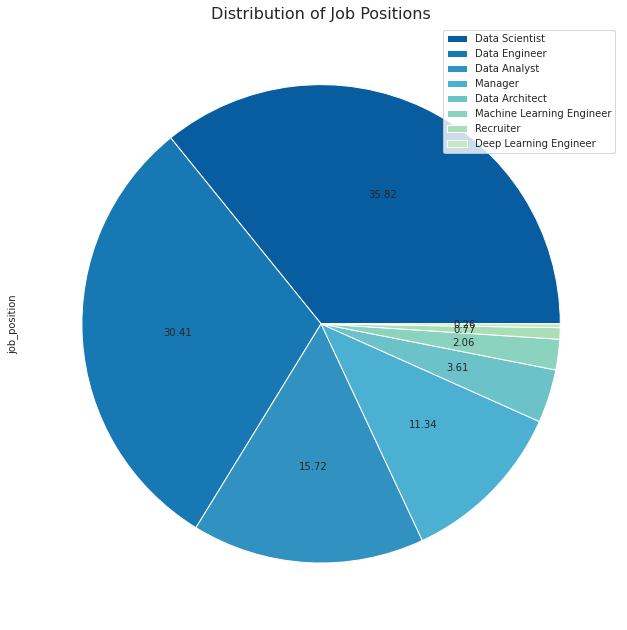

In [167]:
plot_top10_piechart(data_uk[data_uk.job_position != "na"], "job_position", "Distribution of Job Positions")

#### Key Findings:

- In comparison to the US market, here we see that data scientists and engineers are much more demanded than data analysts. This could be because this dataset has way less records than the one for the US

- According to the UK Royal Society, the demand for workers with specialist data skills like data scientists and data engineers has more than tripled over five years (+231%), so this could be also the reason for our results here

- Also, the percentage of data architects and ML engineers is slightly higher in the UK, and the one for DL engineers slightly lower

<br>

#### Now let's create a pivot table, add the seniority level to the job position, and see who gets paid the most:

In [168]:
pd.pivot_table(
    data_uk[data_uk.seniority_level != "na"], 
    index = ["job_position", "seniority_level"], 
    values = ["avg_salary_gbp", "max_salary_gbp", "min_salary_gbp"], 
    margins = True,
    aggfunc = np.max
)

avg_salary_gbp  max_salary_gbp  \
job_position              seniority_level                                   
Data Analyst              Junior                    29000           30000   
                          Manager                   70000           80000   
                          Senior                    65000           80000   
Data Architect            Senior                    95000          100000   
Data Engineer             Director                 160000          170000   
                          Junior                    40000           50000   
                          Manager                  102500          105000   
                          Senior                   100000          110000   
Data Scientist            Junior                    37500           45000   
                          Senior                   130000          135000   
Machine Learning Engineer Senior                   125000          140000   
Manager                   Manager                  110000          125000   
                          Senior                   105000          200000   
Recruiter                 Senior                    60000           80000   
na                        Director                 165000          180000   
                          Junior                    47500           55000   
                          Senior                   120000          130000   
                          Trainee                   32500           45000   
All                                                165000          200000   

                                           min_salary_gbp  
job_position              seniority_level                  
Data Analyst              Junior                    28000  
                          Manager                   60000  
                          Senior                    55000  
Data Architect            Senior                    90000  
Data Engineer             Director                 150000  
                          Junior                    30000  
                          Manager                  100000  
                          Senior                    90000  
Data Scientist            Junior                    30000  
                          Senior                   125000  
Machine Learning Engineer Senior                   110000  
Manager                   Manager                  100000  
                          Senior                    90000  
Recruiter                 Senior                    40000  
na                        Director                 150000  
                          Junior                    40000  
                          Senior                   110000  
                          Trainee                   20000  
All                                                150000

#### Key Findings:

- A Senior Manager has the highest maximum salary (£200,000), followed by a Senior Data Engineer (£170,000), a Director & Senior ML Engineer (£170,000 & £140,000) and a Senior Data Scientist (£135,000). It is interesting that in the UK as well as in the US, data engineers earn higher wages than data scientists

- But... if we take the averages, we can see that Senior Data Scientists have higher average (£130,000) than Senior Data Engineers (£100,000)

- The lowest salaries belong to Junior Data Analysts (£29,000), Trainees (£32,500), and Junior Data Scientists & Engineers (£37,500 & £40,000)

<br>

#### We can have a look again at the job postings for the different job positions in the top 3 locations by postings

In [169]:
pivoted_data_uk = pd.pivot_table(data_uk, index = ['job_location','job_position'], values = 'avg_salary_gbp', aggfunc = 'count').sort_values('job_location', ascending = False)

In [170]:
pivoted_data_uk.loc[["London", "Manchester", "Bristol"]]

avg_salary_gbp
job_location job_position                             
London       Machine Learning Engineer               4
             Data Architect                          6
             Data Engineer                          69
             Data Scientist                         80
             Data Analyst                           24
             Manager                                28
             Recruiter                               2
             na                                     96
Manchester   Data Analyst                            9
             na                                     11
             Manager                                 6
             Machine Learning Engineer               2
             Data Scientist                         10
             Data Engineer                           3
             Data Architect                          2
Bristol      Data Scientist                          2
             Data Architect                          3
             na                                     10
             Manager                                 2

#### Key Findings:

- We see that Data Scientists are the most demanded in London and Bristol, but the data for Manchester isn't providing us with much clarity

- Data Engineers are also very much looked for in London

- We don't see DL engineer positions though, that's a bit surprising

<br>

#### We are approaching the end of this analysis, and we will look at the skills required for different job positions and their relation to the average salary.

In [171]:
skills_pivot_uk = data_uk[["job_position", "python_job", "rstudio_job", "sql_job", "excel_job", "tableau_job", "ml_job", "dl_job","spark_job", "hadoop_job", "tensorflow_job", "avg_salary_gbp"]]

In [172]:
for skill in skills:
    table = pd.pivot_table(
        skills_pivot_uk[skills_pivot_uk.job_position != "na"], 
        index = "job_position", 
        columns = skill, 
        values = "avg_salary_gbp", 
        aggfunc = ["mean", "count"]).rename(columns = {"mean": "Average Salary GBP"}
    )
    print(table)

                          Average Salary GBP               count       
python_job                                 0             1     0      1
job_position                                                           
Data Analyst                    47883.689655  46062.500000  29.0   32.0
Data Architect                  76250.000000  65625.000000  10.0    4.0
Data Engineer                   70049.903226  71879.310345  31.0   87.0
Data Scientist                  60658.785714  63572.072072  28.0  111.0
Deep Learning Engineer                   NaN  75000.000000   NaN    1.0
Machine Learning Engineer                NaN  71250.000000   NaN    8.0
Manager                         69291.666667  67250.000000  24.0   20.0
Recruiter                       41500.000000  55000.000000   2.0    1.0
                          Average Salary GBP           count     
rstudio_job                                0        1      0    1
job_position                                                     
Data Analy

#### Key Findings:

We will observe only the top 5 most interesting for our research positions: data scientist, data analyst, data engineer, ML engineer & DL engineer

Note: The amount of postings for Deep Learning engineers is very limited, therefore the results we receive can be considered biased and not taken as accurate

1. Python

    - Generally, there is no big difference in the salary if Python is required, we can even see some positions that offer higher salaries if it's not, but... for the two most related to Python (data scientist & engineer), having Python in your skillset will definitely improve your wage
    
    - Also, Python skill is required in about 80%, 52%, 74%, 100% and 100% of the job postings for Data Scientist, Data Analyst, Data Engineer, ML Engineer and DL Engineer job positions respectively
    
    - It is interesting that also nearly 50% of the Manager positions demand Python
    
2. RStudio

    - Generally, the salary tends to be a bit higher, where RStudio is mentioned in the Data Scientist postings, but the ratio of required vs. unrequired is showing that Rstudio is not one of the most demanded skills in all data jobs in our list
    
3. SQL

    - Curiously, there is not much of a positive correlation of SQL and higher salaries, Except for the ML positions. The rest are either negative or there is not enough data to say
    
    - Also, this skill is required in about 75%, 53%, 67%, 25% and 0% of the job postings for Data Scientist, Data Analyst, Data Engineer, ML Engineer and DL Engineer job positions respectively
    
4. Excell

    - In most of the positions the presence of Excel in the job description signifies lower salary, except for ML Engineers and Managers
    
    - This skill is required in about 35%, 56%, 25%, 37% and 0% of the job postings for Data Scientist, Data Analyst, Data Engineer, ML Engineer and DL Engineer job positions respectively
    
5. Tableau

    - We can say that in all cases where data is available Tableau relates to lower average salary
    
    - Tableau is required in about 8%, 20%, 3%, 0% and 0% of the job postings for Data Scientist, Data Analyst, Data Engineer, ML Engineer and DL Engineer job positions respectively
    
6. Machine Learning

    - We can confidently conclude that ML improves the chances for higher salary the position of Data Scientist, Data Engineer and Manager, and it doesn't in the position of Data Analyst and Data Architect
    
    - ML skills are required in about 71%, 30%, 18%, 0% and 0% of the job postings for Data Scientist, Data Analyst, Data Engineer, ML Engineer and DL Engineer job positions respectively

7. Deep Learning

    - We can see similar situation as with ML. Deep Learning skills improve the chance for higher salary significantly for Data Scientists and Engineers, almost no change in DL positions

    - DL skills are required in about 18%, 2%, 1%, 38% and 100% of the job postings for Data Scientist, Data Analyst, Data Engineer, ML Engineer and DL Engineer job positions respectively
    
8. Spark

    - Except for Data Analyst we can say that Spark improves the chances for higher salary significantly, especially for Data Architects
    
    - Spark is required in about 17%, 3%, 39%, 62% and 0% of the job postings for Data Scientist, Data Analyst, Data Engineer, ML Engineer and DL Engineer job positions respectively
    
9. Hadoop

    - Same as for Spark, Hadoop improves the salary estimate in all positions data is provided except for Data Engineers
    
    - Hadoop skills are required in about 4%, 0%, 12%, 0% and 0% of the job postings for Data Scientist, Data Analyst, Data Engineer, ML Engineer and DL Engineer job positions respectively
    
10. Tensorflow

    - As it is required in only 3 of the positions, we can say that Tensorflow skills improve the chance for higher salary for Data Scientists and for DL Engineers.
    
    - TF is required in about 4%, 0%, 2%, 42% and 100% of the job postings for Data Scientist, Data Analyst, Data Engineer, ML Engineer and DL Engineer job positions respectively
    

#### Now we can conclude our analysis with the inspection of the correlations of all numerical and binary variables and the correlation of all nominal variables

In [173]:
numerical_and_binary_uk = data_uk.select_dtypes(include = "number")

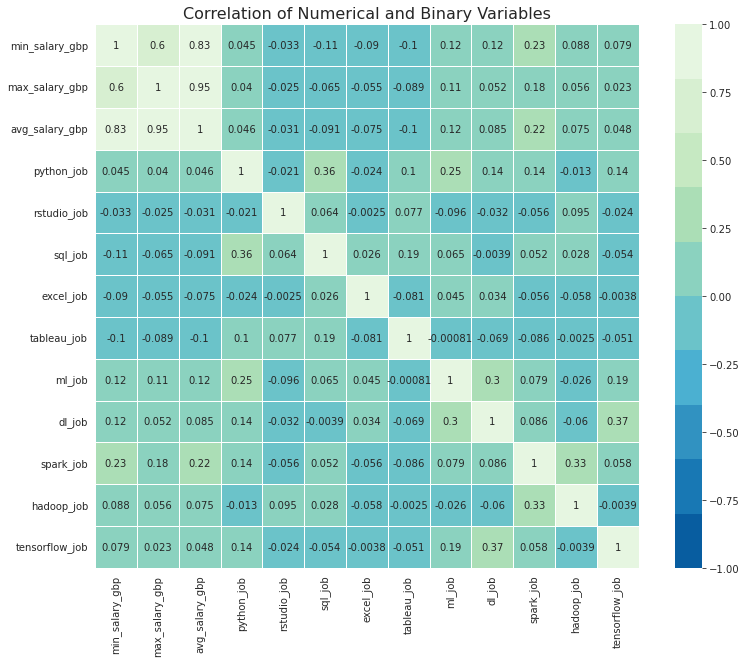

In [174]:
plot_heatmap(numerical_and_binary_uk, "Correlation of Numerical and Binary Variables", (13, 10))

#### Key Findings:

- There are no correlations of high significance, but let's mention a few that are at least slightly correlated:

    1. Strongest correlation is between Tensorflow & Deep Learning.
    
    2. After comes the correlation of Python & SQL, and then Spark & Hadoop. The rest are not too important to mention.

In [175]:
nominal_features_uk = data_uk.select_dtypes(exclude = "number")

In [176]:
nominal_features_uk = nominal_features_uk.apply(lambda x: pd.factorize(x)[0])

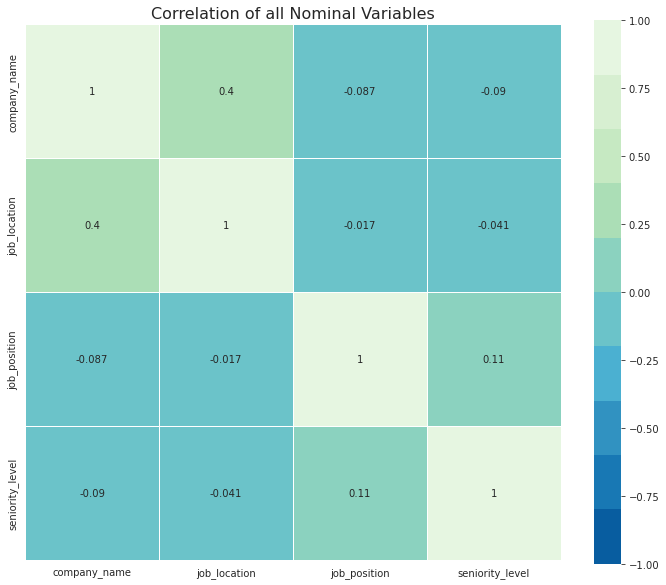

In [177]:
plot_heatmap(nominal_features_uk, "Correlation of all Nominal Variables", (12, 10))

#### Key Findings:

- Apparently there is some correlation between the company's name and the job title, but it's not enough to be considered of high significance

- There's also some correlation between the job location and company's name

- Nothing much more interesting than that

<br> 

#### We can conclude our exploration with a summary of the most important things we've learned...

### Summary:

#### Salary overview:

1. **Minimum salary** values range between £18,000 and £100,000 yearly. The most frequently occuring minimum wage is £60,000.

    - The average of the most expected minimum salaries for data professionals in this dataset range between £55,000 and £60,000.

<br>

3. **Maximum salary** values range between £22,500 and £120,000.  £60,000 is the most frequently occurring wage in our data.

    - We can expect that the average of the maximum salary for a data professional would range in between £60,000 and £70,000

<br>

3. **Average salary** values range between £22,500 and £110,000 yearly. The most frequently occuring average salary is £50,000. 

    - It is somehow safe to say that the most expected average salaries for data professionals range in between the mode and the mean of the distribution £50,000 - £60,000
    
<br>

#### Top Locations by Job Postings overview:

1. In this  dataset London holds the first place, with more than 50% of all the job postings.

2. Manchester follows, as it is announced as the fastest growing tech hub in Europe.

3. Bristol is 3rd, confirming the news that it is one of the fastest growing tech hubs in the UK.

<br>

#### Salary by Location overview:

1. **Minimum Salary by Location** - The London district offers the highest minimum wages.

    - The lowest minimum wages are in Sheffield, Richmond and Portsmouth
    
2. **Maximum Salary per State** - London district is first again with no competition.

    - The lowest maximum wages are in  Liverpool, Chester and Portsmouth

3. **Average Salary per State** - Again, London district offers the highest average wages, no competition.

    - The lowest average wages are in Liverpool, Sheffield and Portsmouth
    
4. Summary:

    - The min, max and average salaries in London could be 3 times higher than the ones in the lowest paid location Liverpool
    
    - The most favorable location to work as a data professional in the UK is definitely London district
    
    - The most unfavorable locations are Liverpool, Sheffield, Chester, Richmond and Portsmouth
    
<br>

#### Hypothesis Testing on Location vs. Salary:

$H_0:$ Company's location is not correlated with the salary

$H_1:$ Company's location is correlated with the salary

1. Location vs. Minimum Salary

    - $H_1$ rejected - it is not a statistically significant correlation

    
2. Location vs. Maximum Salary

    - $H_1$ rejected - there's no significant correlation here as well
        
3. Location vs. Average Salary

    - $H_1$ rejected again

<br>

#### Distribution of Job Positions Overview:

1. Almost 36% of the job postings in our data are for data scientists. Apparently they are the most looked for in the UK.

2. Data engineers have 30% of the rest of the postings, leaving only the remaining 34% for ML & DL engineers, database administrators, data architects, managers and recruiters.

<br>

#### Salary by Job Position Overview:

1. Highest maximum salaries in this dataset (£200,000) belong to Senior Management.

2. Second place goes for Director Data Engineers with £170,000, third for Senior Data Scientists with £135,000.

3. Apparently, ML & DL engineers are not as valued as the top 3, but this is a subject of doubt and further investigation, because we don't have too much observations of those 2 positions.

4. As expected lowest salaries go to Trainee positions, but we can see that Junior Data Scientists and Engineers can be paid very little as well.

<br>

#### Job Positions in the Top 3 States per Postings Overview:

1. Data Scientists are mostly demanded in London and Bristol, we cannot say much about Manchester, due to lack of observations.

As a conclusion we can say that there are more advanced tech and other businesses in London, that look for data scientists.

<br>

#### Overview of the Salary - Skill Relation in Each Job Position:

1. This part of our analysis shows that the highest expected salaries are where DL, ML, SQL, Spark, Hadoop and Tensorflow are mentioned in the requirements, making those skills a must for a good wage.

2. The most demanded skills for our top 5 job positions are as follows:

    - Data Scientist - Python, SQL and ML
    
    - Data Analyst - Excel, SQL and Python
    
    - Data Engineer - Python, SQL and Spark
    
    - ML Engineer - Python, Spark and Tensorflow
    
    - DL Engineer - Tensorflow, DL and Python (all equally demanded)
    
We can see that without being skillful in Python, there is hardly any chance to succeed in that area, except for being a data analyst. SQL and Tensorflow add a lot of possibilities as well.

<br>

#### Overview of Correlation Between the Numerical and Binary Variables (Rating vs. Salary vs. Age vs. Skills):

1. The strongest correlation is between Tensorflow & Deep Learning, and this is more than expected.

2. Python and SQL are also mildly correlated, but not too much.

3. There is a some correlation between Spark & Hadoop as well.


#### Overview of Correlation Between All Nominal Variables (Location vs. Size vs. Owneship vs. Industry vs. Revenue vs. Position vs. Seniority):

1. Some average correlations between the company's name & job title and the company's name and the job location, but nothing too significant.

<br>

### Summary

With this we can conclude our analysis and point out the most important findings:

1. Salaries in the UK data job market can range between £18,000 and £200,000. This is a really big gap, showing the diversity of the positions.

2. There is no significant correlation between the company's location, name and the salary.

3. London district jobs are definitely the ones that pays the best.

4. If you want a good reward for your work - do not apply for a job in Liverpool ;) 

5. Your chance to find a job as data scientist is higher in London district.

6. Learning Python as a must, and add SQL & Tensorflow if you want to have more chances in finding a better paid job.

<br>

With this the analysis of our UK data is finished, for now...

<br>

#### Now, to better understand the similarities and differences between both markets, we can create a table showing the main insights of our EDA:

Note: All UK salaries will be converted to the actual course of USD, and rounded to the nearest thousand, for easier comparison.

 Feature| US Market| UK Market|
| :-------------------------: | :-----------------------------------: | :--------------: |
| Lowest Salary USD| 12,000 | 21,000 |
| Highest Salary USD| 281,000 | 233,000 |
| Estimate Minimum Salary USD| 55,000 | 64,000 |
| Estimate Maximum Salary USD| 95,000 | 82,000 |
| Estimate Average Salary USD| 70,000 | 70,000 |
| Most Job Posts | Texas | London |
| Top Wage Location | California | London |
| Top Wage Position | Data Engineer | Senior Management |
| Top Skill for Data Scientists| Python | Python |
| Top Skill for Data Analysts| Excel | Excel |
| Top Skill for Data Engineers| Python | Python |
| Top Skill for Machine Learning| Python | Python |
| Top Skill for Deep Learning| Tensorflow | Tensorflow |


As a conclusion we can see that there is almost no difference in both markets:

 - There is possibility that an employee might earn less on an entry position in the US, but then earn more on a more Senior position. 

- Also the estimate minimum salary in the UK is higher with $9,000, and the estimate maximum salary in the US is higher with \\$13,000

- The estimate average salary appears to be equal

- California and London districts appear to be two of the best places for data professionals recently

- Besides that, most other results look pretty much the same

<br>

With this, we can finish our EDA (for now). It has been an insightful journey throughout the world of Data Jobs, and we've learned a lot of useful things for our future development as professionals in this area.

<br>

## Model Building

We will build a very basic Logisctic Regression model that tries to predict what is the probability that one of the most required skills in the data world (Python, SQL and Excel) will be required in a data job.

<br>

#### Let's start by selecting the relevant columns for our model

In [178]:
modeling_data = data_us[[
    "avg_salary_usd", 
    "company_rating", 
    "company_size",
    "company_age",
    "company_revenue", 
    "type_of_ownership", 
    "job_state", 
    "python_job", 
    "rstudio_job", 
    "sql_job", 
    "excel_job", 
    "tableau_job", 
    "ml_job", 
    "dl_job", 
    "spark_job", 
    "hadoop_job", 
    "tensorflow_job",
    "seniority_level", 
]]

#### Next step is to convert categorical variable into dummy/indicator variables.

In [179]:
modeling_data_dummies = pd.get_dummies(modeling_data[["company_size", "company_revenue", "type_of_ownership", "job_state", "seniority_level"]])

us_data_for_modelling = pd.concat([modeling_data, modeling_data_dummies], axis = 1)
us_data_for_modelling.head()

,avg_salary_usd,company_rating,company_size,company_age,company_revenue,type_of_ownership,job_state,python_job,rstudio_job,sql_job,...,job_state_WI,seniority_level_Assistant,seniority_level_Chief,seniority_level_Director,seniority_level_Junior,seniority_level_Manager,seniority_level_Senior,seniority_level_Supervisor,seniority_level_Trainee,seniority_level_na
0,79000,3.9,10000+,138,$2 to $5 billion,Nonprofit Organization,NY,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,79000,3.8,1 to 50,28,Unknown / Non-Applicable,Private,NY,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,79000,3.6,501 to 1000,18,$5 to $10 million,Private,NJ,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,79000,3.6,10000+,125,$10+ billion,Public,NJ,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,79000,3.4,201 to 500,15,$100 to $500 million,Public,NY,0,0,0,...,0,0,0,0,0,0,0,0,0,1


- We can now drop the categorical features

In [180]:
us_data_for_modelling.drop(columns = ["company_size", "company_revenue", "type_of_ownership", "job_state", "seniority_level"], axis = 1, inplace = True)

##### Now let's create a function that will allow us to predict the chance that one of 10 skills we observed will be required in a job.

Steps:

1. Normalization - we will normalize our data using the MinMaxscaler, a type of scaler that scales the minimum and maximum values of the columns to be 0 and 1 respectively.
 
2. Train test split - we will use the most common ration 80/20.

3. Using LogisticRegression  - it is more appropriate in our case because it is normally used when the dependent variable(target) is categorical.

4. Show the score.

In [181]:
def predict_skill_requirement(data, target):
    """
    Returns the LogisctiRegression score as a prediction of skill requirement
    """
    skill = target.split("_")[0]
    
    data_features = data.drop(target, axis = 1)
    data_target = data[target]
    
    scaler = MinMaxScaler()
    data_features_scaled = scaler.fit_transform(data_features)
    
    x_train, x_test, y_train, y_test = train_test_split(
        data_features_scaled, 
        data_target, 
        train_size = 0.8, 
        test_size = 0.2, 
        random_state = 42)    
    
    model = LogisticRegression()
    model.fit(data_features, data_target)
    
    score = model.score(data_features, data_target)

    print(f"Logistic Probability Score: {score} \n\nThere is {score * 100:.2f} chance that {skill} is required in a data job\n" + ("-" * 60))

In [182]:
skill_list = ["python_job", "sql_job", "excel_job"]

In [183]:
for skill in skill_list:
    predict_skill_requirement(us_data_for_modelling, skill)

Logistic Probability Score: 0.8091211776044861 

There is 80.91 chance that python is required in a data job
------------------------------------------------------------
Logistic Probability Score: 0.620476649434855 

There is 62.05 chance that sql is required in a data job
------------------------------------------------------------
Logistic Probability Score: 0.576491719968457 

There is 57.65 chance that excel is required in a data job
------------------------------------------------------------


### Summary:

Our mode shows very much expected results, given what we've learned from our EDA.

#### Future implementations:

We can build a model that predicts the salary, based on given parameters as location, company size, revenue, company age, etc...

<br>

With this, our project comes to its end. It has been exciting to learn about the data market in two of the most developed technologically countries, and now it is time to use those insights for our professional development.

## Credits:

- Ken Jee's [YouTube Channel](https://www.youtube.com/c/KenJee1)

- echestare's GitHub [page](https://github.com/echestare/001KenJeeriromScratch_DSSalary)

- USA's [Bureau of Labor Statistics](https://www.bls.gov/oes/current/oes152051.htm)

- UK's [Royal Statistical Society](https://rss.org.uk/)

- Analytics Vidhya's [Medium Blog](https://medium.com/analytics-vidhya/appropriate-ways-to-treat-missing-values-f82f00edd9be)